# Controle da Inadimplência em operações de Crédito

## Descrição do problema

Uma Fintech de crédito possui uma operação de concessão de crédito pessoal. Foi acompanhada a performance de pagamento de 1.000 clientes. Com base nessa amostra, a Fintech quer descobrir quais os fatores de risco dos clientes de forma a conseguir aprovar mais contratos com a menor inadimplência possível.

Assim, será elaborada uma Análise Exploratória de Dados (EDA) da base de dados e serão treinados e avaliados sete modelos de classificação de Machine Learning (Regressão Logística, Árvore de Decisão, Bagging de Regressão Logística, Random Forest, AdaBoost, Gradient Boosting e XG Boost) para avaliar a inadimplência.

Esse estudo de caso foi proposto pela escola de Ciência de Dados "Preditiva Analytics". A base de dados também foi disponibilizada pela escola.


## Informações do Dataset

- **Idade**: Idade do cliente
  
- **Sexo**: H: Homem e M: Mulher

- **Escolaridade**: Medio, Graduação e Pós Graduação

- **Tipo_Moradia**: Se mora de favor, paga aluguel ou tem casa própria

- **Saldo_Investimento**:  Se tomador possui alguma conta investimento em outro banco e qual sua faixa de saldo

- **Saldo_Conta_Corrente**:  Se tomador possui alguma conta corrente em outro banco e qual sua faixa de saldo

- **Valor_Emprestimo**: Valor do empréstimo pessoal solicitado

- **Duracao_Emprestimo**: Duração em meses do empréstimo pessoal solicitado

- **Inadimplencia**: 1 se cliente ficou inadimplente em algum momento após o empréstimo ou 0 caso contrário

## Importação das Bibliotecas

In [7]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd

In [8]:
# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Pacotes de modelagem
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [10]:
# Métricas de Desempenho
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import ks_2samp
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

## Importação da Base de Dados

In [12]:
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name = "Base")

In [13]:
df.head()

,Idade,Sexo,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Inadimplencia
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


## Preparação dos Dados

### *Missing Values*

In [16]:
df.isnull().sum()

Idade                   0
Sexo                    0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Inadimplencia           0
dtype: int64

**A base de dados não apresenta dados faltantes.**

## Duplicações

In [19]:
df.isnull().sum()

Idade                   0
Sexo                    0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Inadimplencia           0
dtype: int64

**A base de dados não apresenta dados duplicados.**

## Tipos de Variáveis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [23]:
print(f'A base de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

A base de dados tem 1000 linhas e 9 colunas.


## Análise Univariada das Variáveis Numéricas

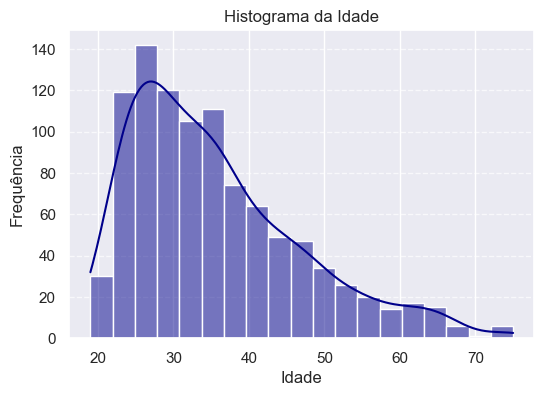

In [25]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df, x='Idade', kde=True, color='darkblue')

plt.title('Histograma da Idade')
plt.xlabel('Idade')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

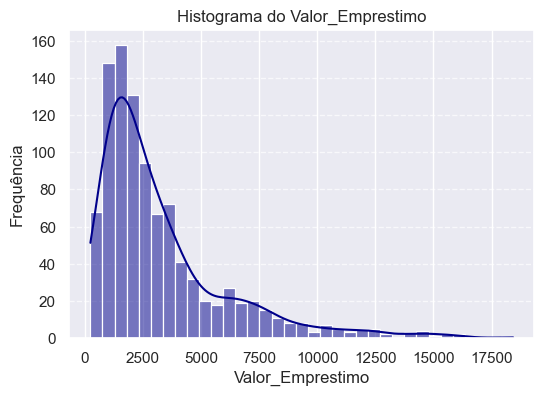

In [26]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df, x='Valor_Emprestimo', kde=True, color='darkblue')

plt.title('Histograma do Valor_Emprestimo')
plt.xlabel('Valor_Emprestimo')  # Nome do eixo x
plt.ylabel('Frequência')  # Nome do eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

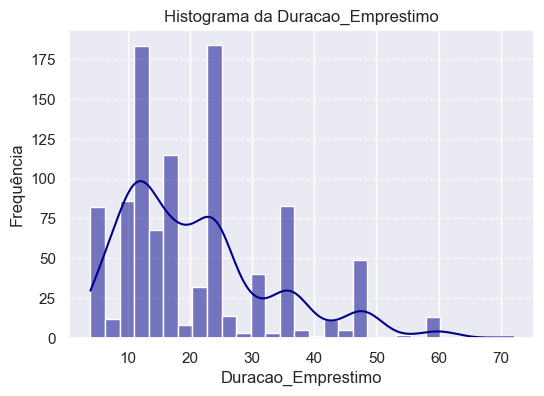

In [27]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df, x='Duracao_Emprestimo', kde=True, color='darkblue')

plt.title('Histograma da Duracao_Emprestimo')
plt.xlabel('Duracao_Emprestimo')  # Nome do eixo x
plt.ylabel('Frequência')  # Nome do eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

Nota-se que tanto Idade quanto Valor_Empréstimo são variáveis que apresentam distribuição assimétrica positivamente. Ou seja, a maioria dos valores está concentrada na parte inferior da distribuição.

A variável Duracao_Emprestimo também apresenta a maior frequência em até 30 meses de empréstimos.

## Análise Univariada das Variáveis Categóricas

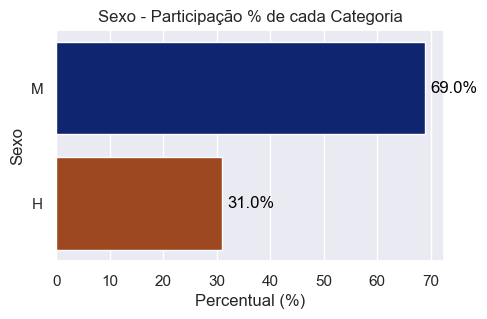

In [29]:
percentuais = df['Sexo'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Sexo - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Sexo') 

plt.show() 

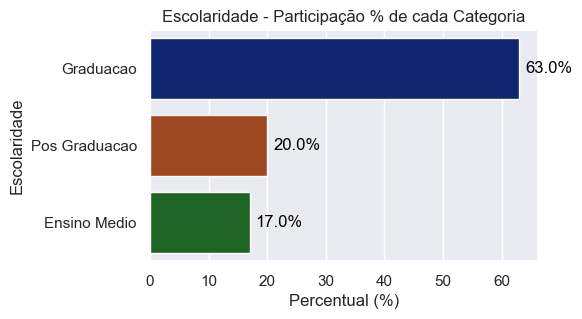

In [30]:
percentuais = df['Escolaridade'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Escolaridade - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Escolaridade') 

plt.show() 

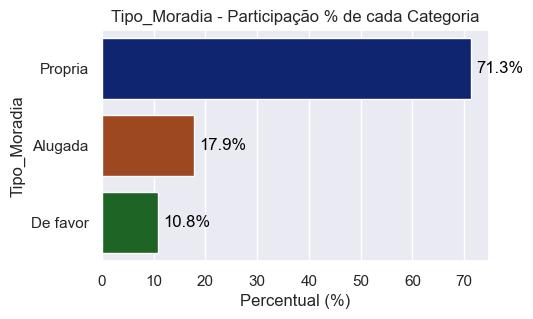

In [31]:
percentuais = df['Tipo_Moradia'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Tipo_Moradia - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Tipo_Moradia') 

plt.show() 

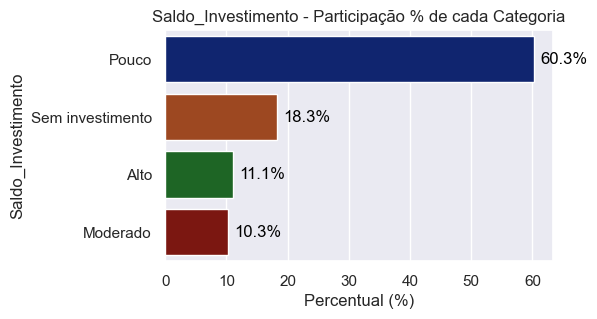

In [32]:
percentuais = df['Saldo_Investimento'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Saldo_Investimento - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Saldo_Investimento') 

plt.show() 

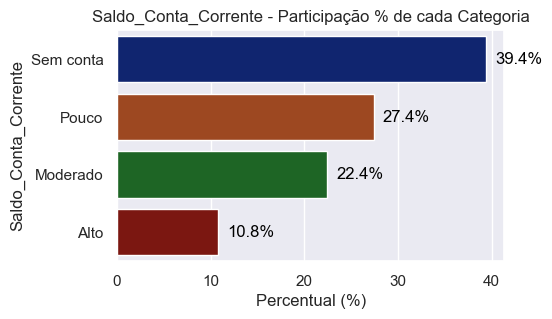

In [33]:
percentuais = df['Saldo_Conta_Corrente'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Saldo_Conta_Corrente - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Saldo_Conta_Corrente') 

plt.show() 

A maioria dos clientes da Fintech são mulheres, possui graduação, possui casa própria, apresenta pouco saldo em investimentos e ou não possui conta ou possui pouco saldo em conta corrente. 

## Análise Multivariada

### Matriz de Correlação

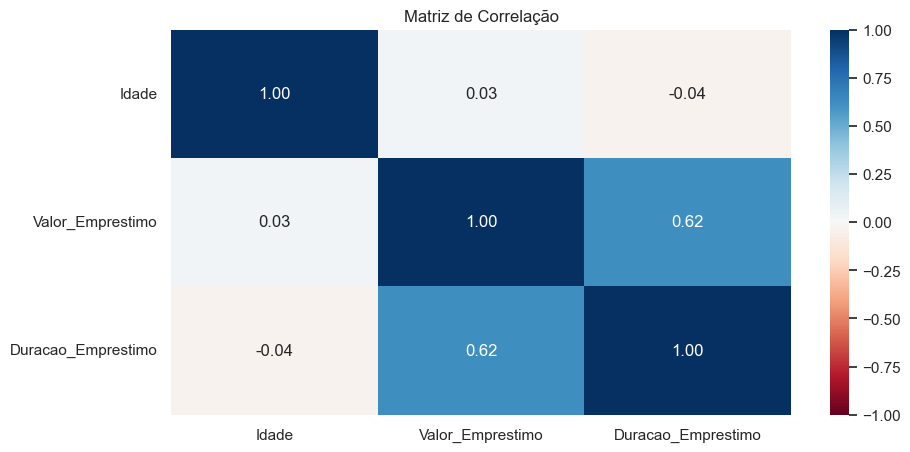

In [446]:
colunas_correlacionar = ['Idade', 'Valor_Emprestimo', 'Duracao_Emprestimo']

correlation_matrix = df[colunas_correlacionar ].corr()

sns.set(rc={'figure.figsize':(10, 5)})  # Ajuste conforme necessário

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f')

plt.title('Matriz de Correlação') 
plt.show()  

Analisando a Matriz de Correlação, é possível verificar que as variáveis numéricas fortemente correlacionadas são de Duracao_Emprestimo e Valor_Emprestimo, o que faz sentido, visto que empréstimos com valores maiores tendem a apresentar maior duração.

As demais variáveis numéricas não apresentam correlação significativas.

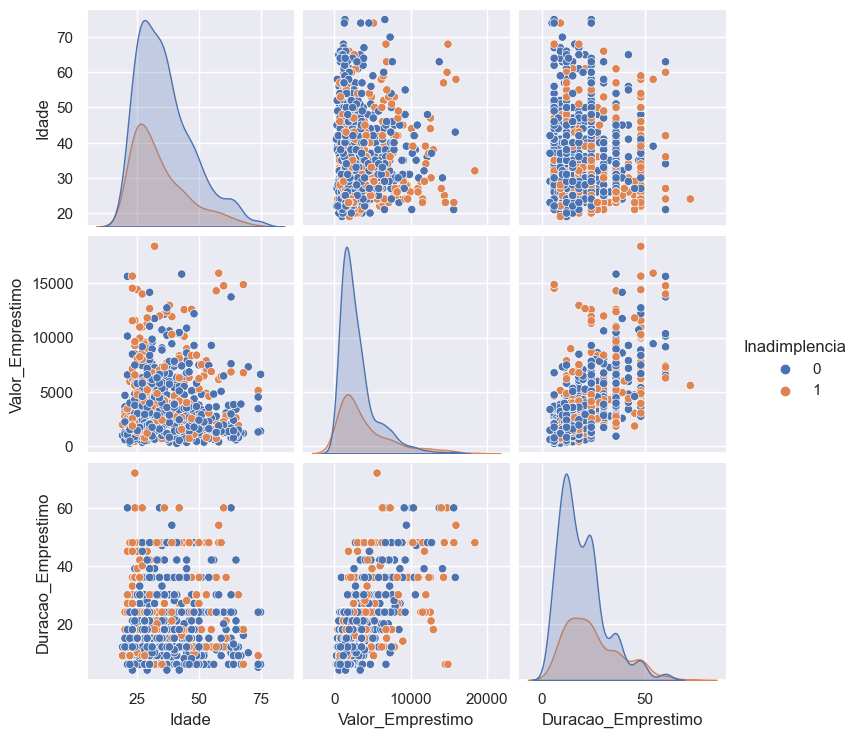

In [37]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df[['Idade','Valor_Emprestimo','Duracao_Emprestimo','Inadimplencia']],hue='Inadimplencia');

Ao analisarmos o Pairplot acima, considerando o hue para diferenciação dos clientes que deram inadimplência (laranja) dos que não deram iadimplência (azul) é possível observar que clientes inadimplentes tendem a ser mais jovens, tomar empréstimos mais baixos e apresentar uma duração de empréstimos menor que os clientes não inadimplentes.

## Análise de Associação das variáveis com a variável Binária "Inadimplência" - Information Value (IV)

#### Elaborando o cálculo do Information Value (IV)

In [40]:
class analise_iv:
        
    def __get_tab_bivariada(self, var_escolhida):
     
        # Cria a contagem de Target_1 e Target_0
        df_aux = self.df.copy() 
        df_aux['target2'] = self.df[self.target]
        df2 = df_aux.pivot_table(values='target2',
                                 index=var_escolhida,
                                 columns=self.target,
                                 aggfunc='count')
        
        df2 = df2.rename(columns={0:'#Target_0',
                                  1:'#Target_1'})
        df2.fillna(0, inplace=True)

        # Cria as demais colunas da tabela bivariada
        df2['Total'] = (df2['#Target_0'] + df2['#Target_1'])
        df2['%Freq'] = (df2['Total'] / (df2['Total'].sum()) * 100).round(decimals=2)
        df2['%Target_1'] = (df2['#Target_1'] / (df2['#Target_1'].sum()) * 100).round(decimals=2)
        df2['%Target_0'] = (df2['#Target_0'] / (df2['#Target_0'].sum()) * 100).round(decimals=2)
        df2['%Target_0'] = df2['%Target_0'].apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['%Taxa_de_Target_1'] = (df2['#Target_1'] / df2['Total'] * 100).round(decimals=2)
        df2['Odds'] = (df2['%Target_1'] / df2['%Target_0']).round(decimals=2)
        df2['Odds'] = df2.Odds.apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['LN(Odds)'] = np.log(df2['Odds']).round(decimals=2)
        df2['IV'] = (((df2['%Target_1'] / 100 - df2['%Target_0'] / 100) * df2['LN(Odds)'])).round(decimals=2)
        df2['IV'] = np.where(df2['Odds'] == 0.01, 0 , df2['IV']) 

        df2 = df2.reset_index()
        df2['Variavel'] = var_escolhida
        df2 = df2.rename(columns={var_escolhida: 'Var_Range'})
        df2 = df2[['Variavel','Var_Range', '#Target_1','#Target_0', 'Total', '%Freq', '%Target_1', '%Target_0',
       '%Taxa_de_Target_1', 'Odds', 'LN(Odds)', 'IV']]
        
        # Guarda uma cópia da tabela no histórico
        self.df_tabs_iv = pd.concat([self.df_tabs_iv, df2], axis = 0)
        
        return df2
        
    def get_bivariada(self, var_escolhida='all_vars'):
        
        if var_escolhida == 'all_vars':
                       
            #vars = self.df.drop(self.target,axis = 1).columns
            vars = self.get_lista_iv().index
            for var in vars:
                tabela = self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]
                print('==> "{}" tem IV de {}'.format(var,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]['IV'].sum().round(decimals=2)))
                # printa a tabela no Jupyter
                display(tabela)
            
            return
        
        else:
            print('==> "{}" tem IV de {}'.format(var_escolhida,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]['IV'].sum().round(decimals=2)))
            return self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]
                   
            
    def get_lista_iv(self):
        
    
        # agrupa a lista de IV's em ordem descrescente
        lista = (self.df_tabs_iv.groupby('Variavel').agg({'IV':'sum'})).sort_values(by=['IV'],ascending=False)
            
        return lista
    
    

    def __init__(self, df, target, nbins=10):

        self.df = df.copy()
        self.target = target

        #lista de variaveis numericas
        df_num = self.df.loc[:,((self.df.dtypes == 'int32') | 
                                (self.df.dtypes == 'int64') | 
                                (self.df.dtypes == 'float64')
                               )
                            ]

        vars = df_num.drop(target,axis = 1).columns

        for var in vars:
            nome_var = 'fx_' + var 
            df_num[nome_var] = pd.qcut(df_num[var], 
                                       q=nbins, 
                                       precision=2,
                                       duplicates='drop')
            df_num = df_num.drop(var, axis = 1)
            df_num = df_num.rename(columns={nome_var: var})

        #lista de variaveis qualitativas
        df_str = self.df.loc[:,((self.df.dtypes == 'object') | 
                                (self.df.dtypes == 'category') |
                                (self.df.dtypes == 'bool'))]


        self.df = pd.concat([df_num,df_str],axis = 1)


         # inicializa tab historica
        self.df_tabs_iv = pd.DataFrame()

        vars = self.df.drop(self.target,axis = 1).columns
        for var in vars:
            self.__get_tab_bivariada(var);

        # remove tabs de iv duplicadas
        self.df_tabs_iv = self.df_tabs_iv.drop_duplicates(subset=['Variavel','Var_Range'], keep='last')

In [41]:
df_iv = analise_iv(df,
                   'Inadimplencia',
                            nbins=5)

In [42]:
df_iv.get_bivariada(var_escolhida='Saldo_Conta_Corrente')

==> "Saldo_Conta_Corrente" tem IV de 0.73


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Conta_Corrente,Alto,21,87,108,10.8,7.00,12.43,19.44,0.56,-0.58,0.03
1,Saldo_Conta_Corrente,Moderado,98,126,224,22.4,32.67,18.00,43.75,1.82,0.60,0.09
2,Saldo_Conta_Corrente,Pouco,135,139,274,27.4,45.00,19.86,49.27,2.27,0.82,0.21
3,Saldo_Conta_Corrente,Sem conta,46,348,394,39.4,15.33,49.71,11.68,0.31,-1.17,0.40


- A variável **"Saldo_Conta_Corrente" foi a que apresentou o maior Information Value (IV) em relação à variável binária "Inadimplência"**. **O IV foi de 0,73** o que é considerado um forte poder de separação entre as variáveis. Assim, **o nível de Saldo em Conta Corrente apresenta um forte poder de separação** para sabermos se o cliente tende a ficar inadimplente em algum momento. Desta forma, ao analisar o nível de Saldo em Conta Corrente de um potencial cliente, a empresa já terá uma boa estimativa se ele ficará inadimplente em algum momento ou não.

- A inadimplência geral da base de dados foi de 30% (300 / 1000). Notamos que a categoria da Variável "Saldo Conta Corrente" denominada de "Pouco" apresentou uma Taxa de Inadimplência de 49,27%, ficando acima da inadimplência geral. O mesmo vale para a categoria "Moderado", que apresentou uma Taxa de Inadimplência de 43,75%.
  
- Uma análise similar pode ser obtida analisando-se a coluna Odds. **Quando o Odds da categoria do Saldo em Conta Corrente é maior que 1, é sinal que temos mais chance de aquela categoria apresentar inadimplência do que de não apresentar inadimplência**. A **Categoria "Pouco"**, por exemplo, foi responsável por 45% dos clientes que aprentaram inadimplência e foi responsável por apenas 19,86% dos clientes que não apresentaram inadimplência, resultando em um **Odds de 2,27** (45% / 19,86% = 2,27). Ou seja, a categoria de clientes com pouco saldo em conta corrente **possui mais chance de dar inadimplência do que de não dar inadimplência**.

- Assim, uma política de ser mais restritiva quanto a conceder crédito para clientes com pouco ou moderado saldo em conta corrente tem forte potencial de reduzir a inadimplência geral da empresa.

In [44]:
df_iv.get_bivariada(var_escolhida='Duracao_Emprestimo')

==> "Duracao_Emprestimo" tem IV de 0.21


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Duracao_Emprestimo,"(3.99, 12.0]",76,283,359,35.9,25.33,40.43,21.17,0.63,-0.46,0.07
1,Duracao_Emprestimo,"(12.0, 15.0]",13,59,72,7.2,4.33,8.43,18.06,0.51,-0.67,0.03
2,Duracao_Emprestimo,"(15.0, 24.0]",109,230,339,33.9,36.33,32.86,32.15,1.11,0.10,0.00
3,Duracao_Emprestimo,"(24.0, 30.0]",19,38,57,5.7,6.33,5.43,33.33,1.17,0.16,0.00
4,Duracao_Emprestimo,"(30.0, 72.0]",83,90,173,17.3,27.67,12.86,47.98,2.15,0.77,0.11


- A variável **"Duracao_Emprestimo" apresentou um Information Value (IV) de 0,21** em relação à variável binária "Inadimplência, o que é considerado um médio poder de separação entre as variáveis. Assim, **a duração do empréstimo apresenta um médio poder de separação** para sabermos se o cliente tende a ficar inadimplente em algum momento. Esse insight faz sentido, uma vez que quanto maior for o tempo de duração do empréstimo, maior a probabilidade de, em algum momento, o cliente ficar inadimplente porque ele terá mais meses de possibilidades de não pagar a parcela. 

- A inadimplência geral da base de dados foi de 30% (300 / 1000). Notamos que a faixa da Variável "Duracao_Emprestimo" de 30 a 72 meses apresentou uma Taxa de Inadimplência de 47,98%, ficando acima da inadimplência geral. 
  
- Uma análise similar pode ser obtida analisando-se a coluna Odds. **Quando o Odds da categoria da Duração do Empréstimo é maior que 1, é sinal que temos mais chance de aquela categoria apresentar inadimplência do que de não apresentar inadimplência**. A **faixa de 30 a 72 meses**, por exemplo, foi responsável por 27,67% dos clientes que aprentaram inadimplência e foi responsável por apenas 12,86% dos clientes que não apresentaram inadimplência, resultando em um **Odds de 2,15** (27,67% / 12,86% = 2,15). Ou seja, a faixa de duração de empréstimo de 30 a 72 meses **possui mais chance de dar inadimplência do que de não dar inadimplência**.

- Assim, uma política de ser mais restritiva quanto a conceder crédito para empréstimos mais longos tem um médio potencial de reduzir a inadimplência geral da empresa.

In [46]:
df_iv.get_bivariada(var_escolhida='Valor_Emprestimo')

==> "Valor_Emprestimo" tem IV de 0.09


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Valor_Emprestimo,"(249.99, 1262.0]",61,140,201,20.1,20.33,20.00,30.35,1.02,0.02,0.00
1,Valor_Emprestimo,"(1262.0, 1906.8]",48,151,199,19.9,16.00,21.57,24.12,0.74,-0.30,0.02
2,Valor_Emprestimo,"(1906.8, 2852.4]",54,146,200,20.0,18.00,20.86,27.00,0.86,-0.15,0.00
3,Valor_Emprestimo,"(2852.4, 4720.0]",52,148,200,20.0,17.33,21.14,26.00,0.82,-0.20,0.01
4,Valor_Emprestimo,"(4720.0, 18424.0]",85,115,200,20.0,28.33,16.43,42.50,1.72,0.54,0.06


- A variável **"Valor_Emprestimo" apresentou um Information Value (IV) de 0,09** em relação à variável binária "Inadimplência, o que é considerado um fraco poder de separação entre as variáveis.
  
- Mas vale a pena ficar atento à faixa de valores de empréstimo acima de $ 4.720, que apresentou uma taxa de inadimplência de 42,5%, ficando acima da média geral de 30%. 

In [48]:
df_iv.get_bivariada(var_escolhida='Tipo_Moradia')

==> "Tipo_Moradia" tem IV de 0.09


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tipo_Moradia,Alugada,70,109,179,17.9,23.33,15.57,39.11,1.50,0.41,0.03
1,Tipo_Moradia,De favor,44,64,108,10.8,14.67,9.14,40.74,1.61,0.48,0.03
2,Tipo_Moradia,Propria,186,527,713,71.3,62.00,75.29,26.09,0.82,-0.20,0.03


- A variável **"Tipo_Moradia" apresentou um Information Value (IV) de 0,09** em relação à variável binária "Inadimplência, o que é considerado um fraco poder de separação entre as variáveis.

In [50]:
df_iv.get_bivariada(var_escolhida='Idade')

==> "Idade" tem IV de 0.07


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Idade,"(18.99, 26.0]",94,146,240,24.0,31.33,20.86,39.17,1.50,0.41,0.04
1,Idade,"(26.0, 30.0]",54,117,171,17.1,18.00,16.71,31.58,1.08,0.08,0.00
2,Idade,"(30.0, 36.0]",56,160,216,21.6,18.67,22.86,25.93,0.82,-0.20,0.01
3,Idade,"(36.0, 45.0]",49,138,187,18.7,16.33,19.71,26.20,0.83,-0.19,0.01
4,Idade,"(45.0, 75.0]",47,139,186,18.6,15.67,19.86,25.27,0.79,-0.24,0.01


- A variável **"Idade" apresentou um Information Value (IV) de 0,07** em relação à variável binária "Inadimplência, o que é considerado um fraco poder de separação entre as variáveis.

In [52]:
df_iv.get_bivariada(var_escolhida='Sexo')

==> "Sexo" tem IV de 0.03


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Sexo,H,109,201,310,31.0,36.33,28.71,35.16,1.27,0.24,0.02
1,Sexo,M,191,499,690,69.0,63.67,71.29,27.68,0.89,-0.12,0.01


- A variável **"Sexo" apresentou um Information Value (IV) de 0,03** em relação à variável binária "Inadimplência, o que é considerado um fraco poder de separação entre as variáveis.

In [54]:
df_iv.get_bivariada(var_escolhida='Saldo_Investimento')

==> "Saldo_Investimento" tem IV de 0.2


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Investimento,Alto,17,94,111,11.1,5.67,13.43,15.32,0.42,-0.87,0.07
1,Saldo_Investimento,Moderado,34,69,103,10.3,11.33,9.86,33.01,1.15,0.14,0.00
2,Saldo_Investimento,Pouco,217,386,603,60.3,72.33,55.14,35.99,1.31,0.27,0.05
3,Saldo_Investimento,Sem investimento,32,151,183,18.3,10.67,21.57,17.49,0.49,-0.71,0.08


- A variável **"Saldo_Investimento" apresentou um Information Value (IV) de 0,02** em relação à variável binária "Inadimplência, o que é considerado um fraco poder de separação entre as variáveis.

In [56]:
df_iv.get_bivariada(var_escolhida='Escolaridade')

==> "Escolaridade" tem IV de 0.01


Inadimplencia,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Escolaridade,Ensino Medio,58,112,170,17.0,19.33,16.00,34.12,1.21,0.19,0.01
1,Escolaridade,Graduacao,186,444,630,63.0,62.00,63.43,29.52,0.98,-0.02,0.00
2,Escolaridade,Pos Graduacao,56,144,200,20.0,18.67,20.57,28.00,0.91,-0.09,0.00


- A variável **"Escolaridade" apresentou um Information Value (IV) de 0,01** em relação à variável binária "Inadimplência, o que é considerado um poder de separação muito fraco entre as variáveis.
  
- Por ser uma variável de tão fraco poder de separação, pode valer a pena a empresa desconsiderar essa variável para avaliar se fornece o crédito para o cliente ou não. Seria uma informação a menos para ser preenchida e menor seria o risco de constrangimento do potencial cliente em fornecer essa informação.

## Desenvolvimento do Modelo

### Definição do *Target* e das *Features*

In [60]:
# Target (variável resposta)

y = df['Inadimplencia']

In [61]:
# Features (variáveis explicativas)
x_var = [
    'Idade', 'Sexo', 'Escolaridade', 'Tipo_Moradia', 'Saldo_Investimento','Saldo_Conta_Corrente','Valor_Emprestimo','Duracao_Emprestimo'
]
x = pd.get_dummies(df[x_var], drop_first=True)

In [62]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Inadimplencia, dtype: int64

In [63]:
x.head()

,Idade,Valor_Emprestimo,Duracao_Emprestimo,Sexo_M,Escolaridade_Graduacao,Escolaridade_Pos Graduacao,Tipo_Moradia_De favor,Tipo_Moradia_Propria,Saldo_Investimento_Moderado,Saldo_Investimento_Pouco,Saldo_Investimento_Sem investimento,Saldo_Conta_Corrente_Moderado,Saldo_Conta_Corrente_Pouco,Saldo_Conta_Corrente_Sem conta
0,67,1169,6,True,True,False,False,True,False,False,True,False,True,False
1,22,5951,48,False,True,False,False,True,False,True,False,True,False,False
2,49,2096,12,True,False,True,False,True,False,True,False,False,False,True
3,45,7882,42,True,True,False,True,False,False,True,False,False,True,False
4,53,4870,24,True,True,False,True,False,False,True,False,False,True,False


### Divisão das bases em Treino e Teste

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [66]:
print(f'A base de dados de treino possui {x_train.shape[0]} linhas e {x_train.shape[1]} colunas.')

A base de dados de treino possui 700 linhas e 14 colunas.


In [67]:
print(f'A base de dados de teste possui {x_test.shape[0]} linhas e {x_test.shape[1]} colunas.')

A base de dados de teste possui 300 linhas e 14 colunas.


### Balanceamento das Classes

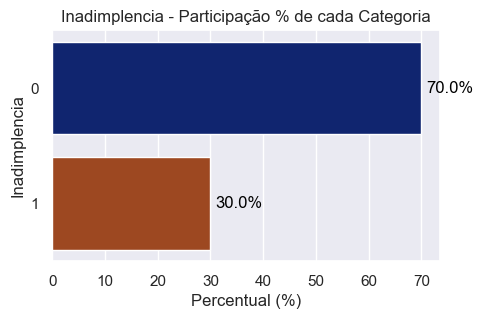

In [69]:
percentuais = df['Inadimplencia'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Inadimplencia - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Inadimplencia') 

plt.show() 

Como podemos verificar acima, 70% das observações da coluna Inadimplência são do tipo 0 (Clientes que não ficaram inadimplentes em algum momento).

Ou seja, **essa base é desbalanceada. Para bases desbalanceadas, a Acurácia não é uma métrica de desempenho muito boa** porque, neste tipo de base, a maioria das instâncias pertence a uma classe majoritária, enquanto uma minoria pertence a uma classe minoritária. Então, se um modelo simplesmente predizer a classe majoritária para todas as instâncias, ele ainda pode obter uma alta Acurácia. Isso ocorre porque a maioria das previsões estará correta apenas devido à predominância da classe majoritária, ignorando completamente a classe minoritária. 

Ex: uma base de dados com 1000 instâncias, das quais 950 pertencem à classe majoritária (classe 0) e 50 pertencem à classe minoritária (classe 1).
Um modelo que prediz sempre a classe 0 terá uma acurácia de 95% (950/1000), mesmo que ele nunca consiga prever corretamente a classe 1.
Essa acurácia de 95% pode parecer muito boa à primeira vista, mas o modelo não tem utilidade prática porque falha completamente em identificar a classe minoritária.

Na base em questão, se montarmos um modelo de classificação que estima todas as instâncias como sendo do tipo 0, já teríamos uma Acurácia de 70%. Então, iremos olhar com mais ênfase as outras métricas de desempenho

### Criando o nosso Modelo Base-Line:

### Modelo individual: Regressão Logística

In [73]:
# Definição do modelo
modelo_rl = LogisticRegression(max_iter=100)

# Ajuste do Modelo
modelo_rl.fit(x_train, y_train)

LogisticRegression()

In [74]:
# Cálculo dos valores preditos
ypred_train = modelo_rl.predict(x_train)
ypred_proba_train = modelo_rl.predict_proba(x_train)[:,1]

ypred_test = modelo_rl.predict(x_test)
ypred_proba_test = modelo_rl.predict_proba(x_test)[:,1]

#### Matriz de Confusão do Modelo de Regressão Logística

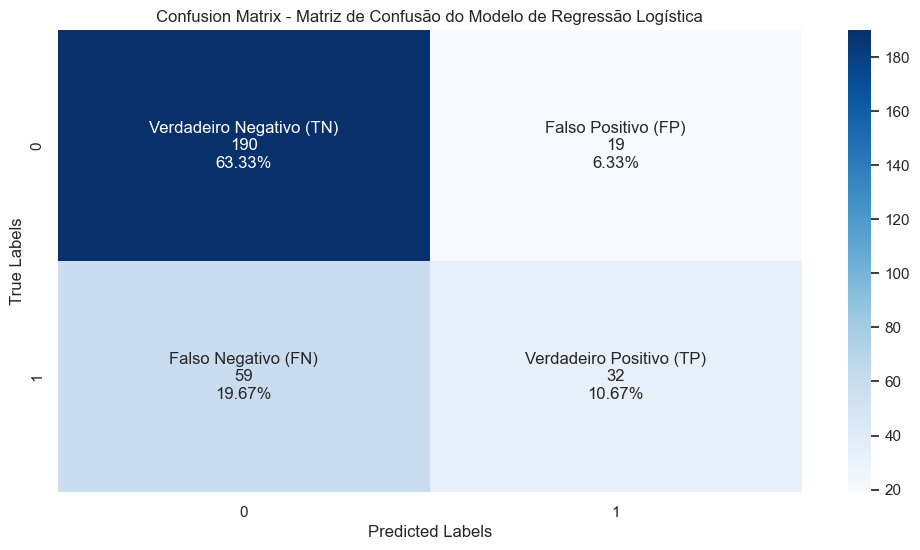

In [76]:
cm = confusion_matrix(y_test, modelo_rl.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo de Regressão Logística') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (59 + 32) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (190 + 19) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **32** observações Verdadeiro Positivo. Ou seja, observações que o Modelo de Regressão Logística previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **19** observações Falso Positivo. Ou seja, observações que o Modelo de Regressão Logística previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **190** observações Verdadeiro Negativo. Ou seja, observações que o Modelo de Regressão Logística previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **59** observações Falso Negativo. Ou seja, observações que o Modelo de Regressão Logística previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.

#### Métricas de Desempenho do Modelo de Regressão Logística

In [82]:
# Métricas de Desempenho
acc_train = accuracy_score(y_train, ypred_train)
acc_test = accuracy_score(y_test, ypred_test)
    
roc_train = roc_auc_score(y_train, ypred_proba_train)
roc_test = roc_auc_score(y_test, ypred_proba_test)
    
prec_train = precision_score(y_train, ypred_train, zero_division=0)
prec_test = precision_score(y_test, ypred_test, zero_division=0)
    
recl_train = recall_score(y_train, ypred_train)
recl_test = recall_score(y_test, ypred_test)
    
f1_train = f1_score(y_train, ypred_train)
f1_test = f1_score(y_test, ypred_test)

In [83]:
desemp_rl = pd.DataFrame({'Treino':[acc_train, roc_train, 
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_rl['Variação %'] = round(desemp_rl['Teste'] / desemp_rl['Treino'] - 1, 2)*100

In [84]:
desemp_rl

,Treino,Teste,Variação %
Acurácia,0.754286,0.740000,-2.0
AUROC,0.764050,0.766970,0.0
Precision,0.643411,0.627451,-2.0
Recall,0.397129,0.351648,-11.0
F1,0.491124,0.450704,-8.0


### Interpretação de Métricas de Performance

Uma das principais Métricas de Performance em modelos de classificação é o **Recall (ou Sensibilidade)**. Ela é calculada dividindo-se os Verdadeiros Positivos (TP) pela soma de Verdadeiros Positivos (TP) e Falsos Negativos (FN), conforme fórmula abaixo.

<img src="https://uploaddeimagens.com.br/images/004/816/815/full/Recall.jpg">


Ou seja, **de todas as classificações que, de fato, foram positivas, quantas o meu modelo previu que seriam positivas**. Dito de outra forma, o Recall mostra a proporção de casos positivos reais que o modelo conseguiu identificar corretamente. É crítico quando é essencial capturar o máximo de casos positivos.

No caso desta base de dados, um **Recall de 35%, por exemplo**, nos informa que **de cada 100 clientes que deram inadimplência, o modelo preveria que 35 seriam inadimplentes**. Nesse cenário, a empresa negaria crédito para 35 clientes que provavelmente se tornariam inadimplentes **mas aprovaria crédito para 65 (100 - 35) clientes que provavelmente se tornariam inadimplentes**.

Quanto maior for essa métrica, melhor. No caso desta base de dados, quanto maior o Recall, maior será a assertividade do modelo em identificar clientes que provavelmente se tornarão inadimplentes, o que redurizá o prejuízo da empresa de emprestar para clientes que não lhe pagarão de volta.

O Recall da base de testes obtido pelo Modelo de Regressão Logística foi de de 35,16%. O seu calculo foi realizado dividindo-se 32 observações Verdadeiro Positivo (TP) pelo total de clientes que, de fato, deram inadimplência (91 = 59 + 32).

Outra Métrica de Performance muito importante de Modelos de Classificação é o **Precision**. Ela é calculada dividindo-se os Verdadeiros Positivos (TP) pela soma de Verdadeiros Positivos (TP) e Falsos Positivos (FP), conforme fórmula abaixo.

<img src="https://uploaddeimagens.com.br/images/004/816/842/full/Precision.jpg">

Ou seja, **de todas as classificações que o meu modelo previu que seriam positivas, quantas de fato foram positivas**. Dito de outra forma, o Precision calcula a proporção de previsões positivas que foram corretas. É especialmente importante quando o custo de um Falso Positivo é alto.

No caso desta base de dados, um **Precision de 60%, por exemplo**, nos informa que **de cada 100 clientes que o modelo previu que dariam inadimplência, 60 deram inadimplência, de fato**. Nesse cenário, a cada 100 potenciais clientes, a empresa **deixaria de emprestar para 40 (100-60) *bons* clientes**. Ou seja, ela deixaria de fechar bons negócios com 40 clientes, o que é um custo de oportunidade para a empresa.

Quanto maior for essa métrica, melhor. No caso desta base de dados, quanto maior o Precision, mais bons negócios a empresa fará, pois menor serão os Falsos Positivos. Ou seja, menor será a quantidade de bons clientes para quem a empresa deixará de emprestar.

O Precision da base de testes obtido pelo Modelo de Regressão Logística foi de de 62,74%. O seu calculo foi realizado dividindo-se 32 observações Verdadeiro Positivo (TP) pelo total de clientes que o modelo previu que dariam inadimplência (51 = 32 + 19).

#### Curva ROC do Moodelo de Regressão Logística

In [79]:
# Calculando a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_test)
roc_auc = auc(fpr, tpr)

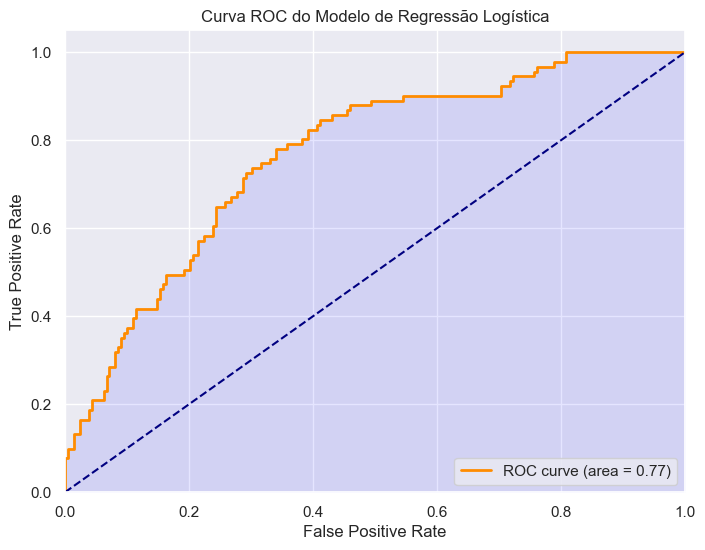

In [80]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo de Regressão Logística')
plt.legend(loc='lower right')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

- No gráfico acima, nós temos **no Eixo Y** o **True Positive Rate (TPR)** que nada mais é que a métrica de desempenho **Recall**. Ou seja, de todas as classificações que, de fato, foram positivas, quantas o modelo previu que seriam positivas.
  
- No **Eixo X** nós temos a **False Positive Rate**. Ela é calculada como 1 - True Negative Rate (TNR). A TNR é a divisão dos Verdadeiros Negativos (TN) pela soma dos Verdadeiros Negativos (TN) com os Falsos Positivos (FP). Ou seja, a True Negative Rate nos retorna de todas as classificações que, de fato, foram negativas, quantas o modelo previu que seriam negativas.
  
- Um modelo de classificação perfeito teria 100% de True Positive Rate (TPR) e 100% de True Negative Rate (TNR). Ou seja, esse modelo perfeito não apresentaria Falsos Positivos e nem Falsos Negativos.
  
- Por isso que o Eixo X do gráfico acima é 1 - True Negative Rate (TNR). Porque iremos calcular a área desse gráfico para obtermos uma medida de performance do modelo. Assim, quanto mais próxima à diagonal superior esquerda do gráfico, maior será a área abaixo da curva. Essa será a área de um modelo perfeito, em que a True Positive Rate (no Eixo Y) será de 100% e 1 - True Negative Rate (TNR) será de 0% (no Eixo X), já que, nesse modelo perfeito, a TNR será de 100%.
  
- A curva laranja do gráfico acima é conhecida como Curva ROC (Receiver Operating Characteristic Curve. Em português, Curva Característica de Operação do Receptor). E a área abaixo dessa curva é conhecida como AUC, ou AUROC (Area Under Curve. Ou seja, área abaixo da curva ROC). Quanto maior for o indicador AUC, maior será a capacidade do modelo de identificar Verdadeiros Positivos e Verdadeiros Negativos e menores serão os Falsos Positivos e Falsos Negativos.  

### Módelo Individual - Árvore de Decisão (Decision Tree)

In [89]:
# Definição do modelo
modelo_dt = DecisionTreeClassifier(min_samples_leaf=5,
                                     max_depth=3,
                                     random_state=42)

In [90]:
# Ajuste do Modelo
modelo_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [91]:
# Cálculo dos valores preditos
ypred_train_dt = modelo_dt.predict(x_train)
ypred_proba_train_dt = modelo_dt.predict_proba(x_train)[:,1]

ypred_test_dt = modelo_dt.predict(x_test)
ypred_proba_test_dt = modelo_dt.predict_proba(x_test)[:,1]

#### Matriz de Confusão do Modelo de Árvore de Decisão

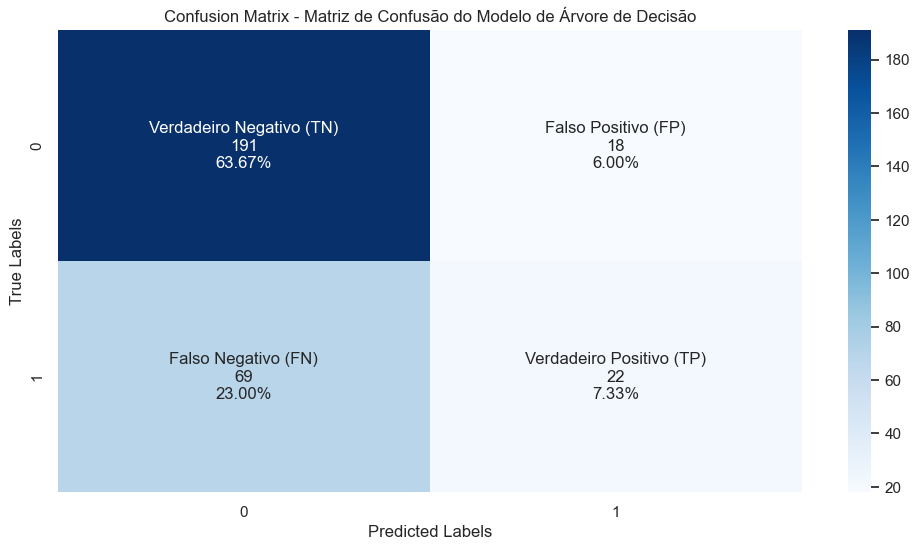

In [93]:
cm = confusion_matrix(y_test, modelo_dt.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo de Árvore de Decisão') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (69 + 22) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (191 + 18) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **22** observações Verdadeiro Positivo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **18** observações Falso Positivo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **191** observações Verdadeiro Negativo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **69** observações Falso Negativo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.

#### Curva ROC do Moodelo de Árvore de Decisão

In [96]:
# Calculando a Curva ROC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, ypred_proba_test_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

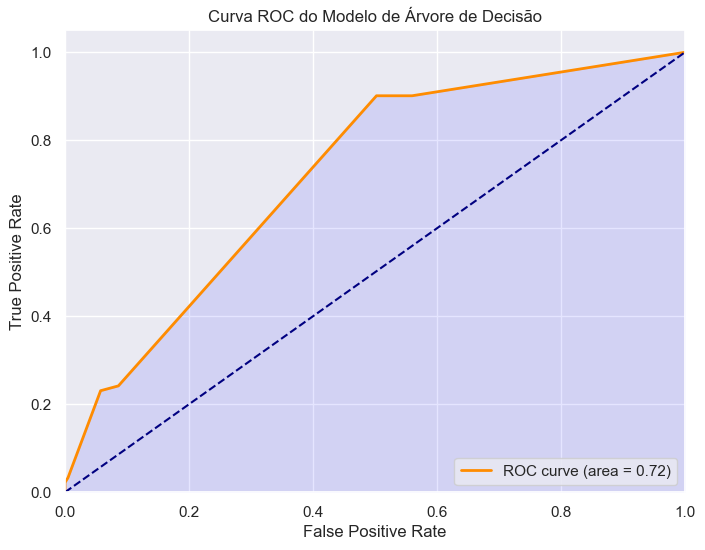

In [97]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo de Árvore de Decisão')
plt.legend(loc='lower right')
plt.fill_between(fpr_dt,tpr_dt,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

#### Métricas de Desempenho do Modelo de Árvore de Decisão

In [99]:
# Métricas de Desempenho
acc_train_dt = accuracy_score(y_train, ypred_train_dt)
acc_test_dt = accuracy_score(y_test, ypred_test_dt)
    
roc_train_dt = roc_auc_score(y_train, ypred_proba_train_dt)
roc_test_dt = roc_auc_score(y_test, ypred_proba_test_dt)
    
prec_train_dt = precision_score(y_train, ypred_train_dt, zero_division=0)
prec_test_dt = precision_score(y_test, ypred_test_dt, zero_division=0)
    
recl_train_dt = recall_score(y_train, ypred_train_dt)
recl_test_dt = recall_score(y_test, ypred_test_dt)
    
f1_train_dt = f1_score(y_train, ypred_train_dt)
f1_test_dt = f1_score(y_test, ypred_test_dt)

In [100]:
desemp_dt = pd.DataFrame({'Treino':[acc_train_dt, roc_train_dt, 
                                        prec_train_dt, recl_train_dt, f1_train_dt],
                              'Teste':[acc_test_dt, roc_test_dt,
                                       prec_test_dt, recl_test_dt, f1_test_dt]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_dt['Variação %'] = round(desemp_dt['Teste'] / desemp_dt['Treino'] - 1, 2)*100

In [101]:
desemp_dt

,Treino,Teste,Variação %
Acurácia,0.754286,0.710000,-6.0
AUROC,0.739668,0.721883,-2.0
Precision,0.703297,0.550000,-22.0
Recall,0.306220,0.241758,-21.0
F1,0.426667,0.335878,-21.0


### Ensemble: *Bagging de Regressão Logística*

In [103]:
# Inicia o estimador base para o Bagging
modelo_base = LogisticRegression(max_iter=1000)

In [104]:
num_estimadores = 100

In [105]:
# Classificador de Bagging

modelo_bagging = BaggingClassifier(estimator = modelo_base, 
                                   n_estimators = num_estimadores, 
                                   max_samples=0.5,
                                   max_features=0.5,
                                   random_state = 42, 
                                   n_jobs=-1) 

In [106]:
# Ajuste do Modelo
modelo_bagging.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_features=0.5,
                  max_samples=0.5, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [107]:
# Cálculo dos valores preditos
ypred_train_bagging = modelo_bagging.predict(x_train)
ypred_proba_train_bagging = modelo_bagging.predict_proba(x_train)[:,1]

ypred_test_bagging = modelo_bagging.predict(x_test)
ypred_proba_test_bagging = modelo_bagging.predict_proba(x_test)[:,1]

#### Matriz de Confusão do Modelo de Bagging de Regressão Logística

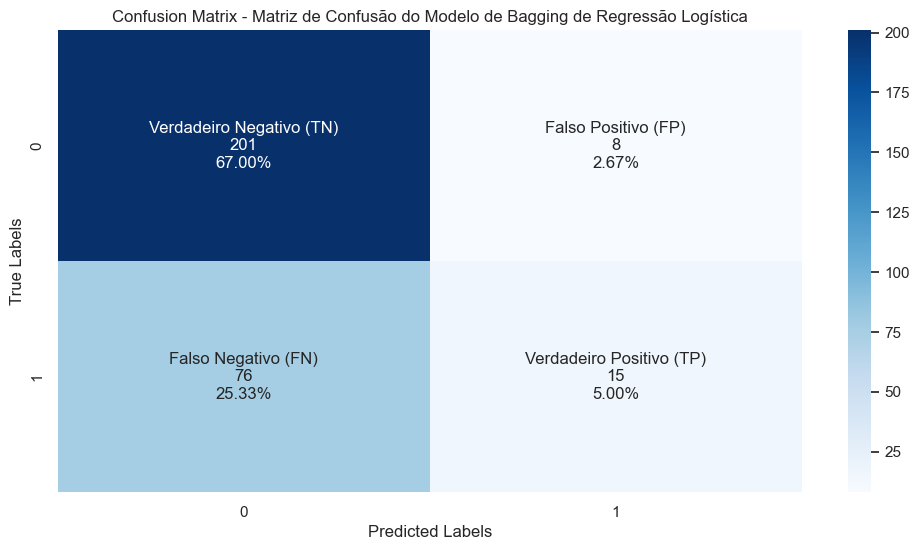

In [109]:
cm = confusion_matrix(y_test, modelo_bagging.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo de Bagging de Regressão Logística') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (76 + 15) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (201 + 8) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **15** observações Verdadeiro Positivo. Ou seja, observações que o Modelo de Bagging de Regressão Logística previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **8** observações Falso Positivo. Ou seja, observações que o Modelo de Bagging de Regressão Logística previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **201** observações Verdadeiro Negativo. Ou seja, observações que o Modelo de Bagging de Regressão Logística previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **76** observações Falso Negativo. Ou seja, observações que o Modelo de Bagging de Regressão Logística previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.

#### Curva ROC do Modelo Bagging de Regressão Logística

In [112]:
# Calculando a Curva ROC
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, ypred_proba_test_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

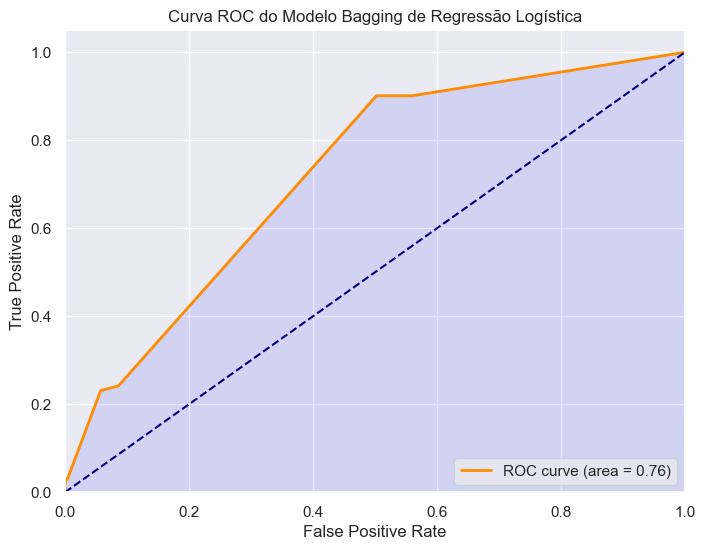

In [113]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_bagging:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo Bagging de Regressão Logística')
plt.legend(loc='lower right')
plt.fill_between(fpr_dt,tpr_dt,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

#### Métricas de Desempenhos do Modelo de Bagging de Regressão Logística

In [115]:
# Métricas de Desempenho
acc_train_bagging = accuracy_score(y_train, ypred_train_bagging)
acc_test_bagging = accuracy_score(y_test, ypred_test_bagging)
    
roc_train_bagging = roc_auc_score(y_train, ypred_proba_train_bagging)
roc_test_bagging = roc_auc_score(y_test, ypred_proba_test_bagging)
    
prec_train_bagging = precision_score(y_train, ypred_train_bagging, zero_division=0)
prec_test_bagging = precision_score(y_test, ypred_test_bagging, zero_division=0)
    
recl_train_bagging = recall_score(y_train, ypred_train_bagging)
recl_test_bagging = recall_score(y_test, ypred_test_bagging)
    
f1_train_bagging = f1_score(y_train, ypred_train_bagging)
f1_test_bagging = f1_score(y_test, ypred_test_bagging)

In [116]:
desemp_bagging = pd.DataFrame({'Treino':[acc_train_bagging, roc_train_bagging, 
                                        prec_train_bagging, recl_train_bagging, f1_train_bagging],
                              'Teste':[acc_test_bagging, roc_test_bagging,
                                       prec_test_bagging, recl_test_bagging, f1_test_bagging]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_bagging['Variação %'] = round(desemp_bagging['Teste'] / desemp_bagging['Treino'] - 1, 2)*100

In [117]:
desemp_bagging

,Treino,Teste,Variação %
Acurácia,0.722857,0.720000,-0.0
AUROC,0.764196,0.762290,-0.0
Precision,0.641509,0.652174,2.0
Recall,0.162679,0.164835,1.0
F1,0.259542,0.263158,1.0


### Ensemble: *Bagging Random Forest*

In [119]:
modelo_rf = RandomForestClassifier(n_estimators=100, 
                                   min_samples_leaf=10, 
                                   max_depth=3,
                                   random_state = 42)

In [120]:
modelo_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [121]:
# Cálculo dos valores preditos
ypred_train_rf = modelo_rf.predict(x_train)
ypred_proba_train_rf = modelo_rf.predict_proba(x_train)[:,1]

ypred_test_rf = modelo_rf.predict(x_test)
ypred_proba_test_rf = modelo_rf.predict_proba(x_test)[:,1]

#### Matriz de Confusão do Modelo Random Forest

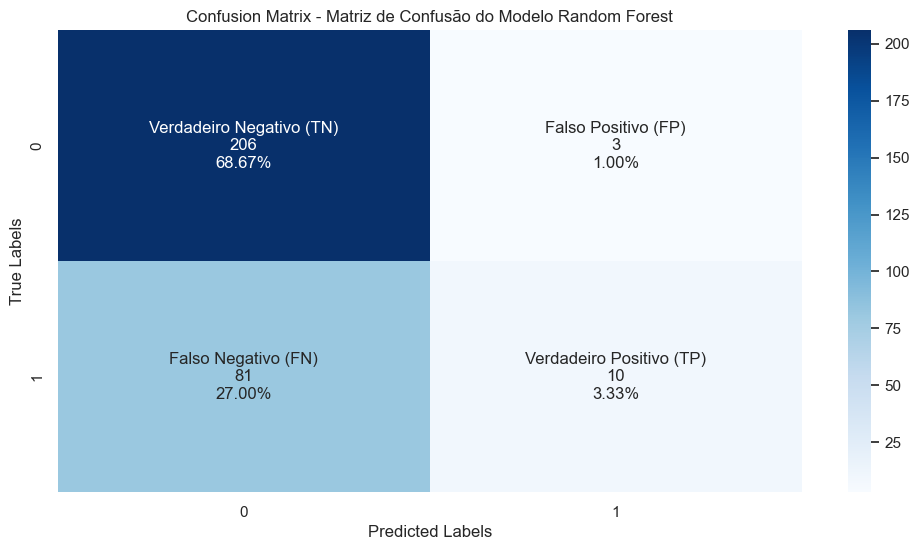

In [123]:
cm = confusion_matrix(y_test, modelo_rf.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo Random Forest') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (81 + 10) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (206 + 3) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **10** observações Verdadeiro Positivo. Ou seja, observações que o Modelo Random Forest previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **3** observações Falso Positivo. Ou seja, observações que o Modelo Random Forest previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **206** observações Verdadeiro Negativo. Ou seja, observações que o Modelo Random Forest previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **81** observações Falso Negativo. Ou seja, observações que o Modelo Random Forest previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.

#### Curva ROC do Modelo Random Forest

In [126]:
# Calculando a Curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, ypred_proba_test_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

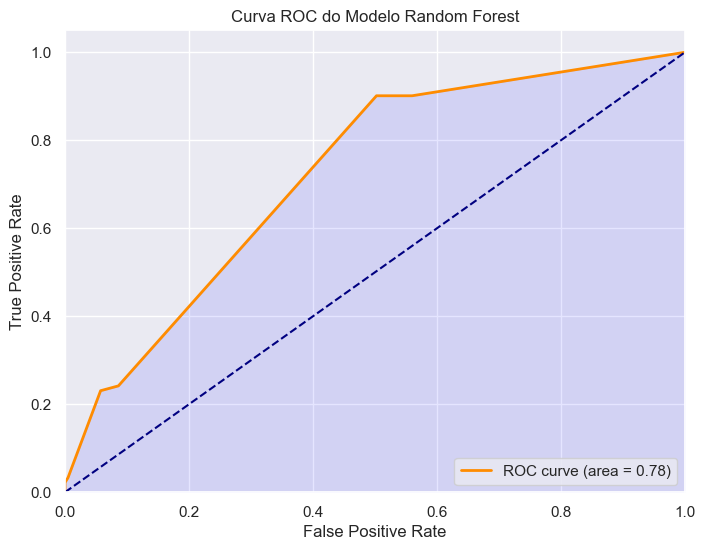

In [127]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo Random Forest')
plt.legend(loc='lower right')
plt.fill_between(fpr_dt,tpr_dt,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

#### Métricas de Desempenho do Modelo Random Forest

In [129]:
# Métricas de Desempenho
acc_train_rf = accuracy_score(y_train, ypred_train_rf)
acc_test_rf = accuracy_score(y_test, ypred_test_rf)
    
roc_train_rf = roc_auc_score(y_train, ypred_proba_train_rf)
roc_test_rf = roc_auc_score(y_test, ypred_proba_test_rf)
    
prec_train_rf = precision_score(y_train, ypred_train_rf, zero_division=0)
prec_test_rf = precision_score(y_test, ypred_test_rf, zero_division=0)
    
recl_train_rf = recall_score(y_train, ypred_train_rf)
recl_test_rf = recall_score(y_test, ypred_test_rf)
    
f1_train_rf = f1_score(y_train, ypred_train_rf)
f1_test_rf = f1_score(y_test, ypred_test_rf)

In [130]:
desemp_rf = pd.DataFrame({'Treino':[acc_train_rf, roc_train_rf, 
                                        prec_train_rf, recl_train_rf, f1_train_rf],
                              'Teste':[acc_test_rf, roc_test_rf,
                                       prec_test_rf, recl_test_rf, f1_test_rf]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_rf['Variação %'] = round(desemp_rf['Teste'] / desemp_rf['Treino'] - 1, 2)*100

In [131]:
desemp_rf

,Treino,Teste,Variação %
Acurácia,0.740000,0.720000,-3.0
AUROC,0.798259,0.775383,-3.0
Precision,0.885714,0.769231,-13.0
Recall,0.148325,0.109890,-26.0
F1,0.254098,0.192308,-24.0


### Ensemble: *Boosting* - **AdaBoost**

In [133]:
modelo_ada = AdaBoostClassifier(n_estimators=50,
                                learning_rate = 0.6,
                                random_state = 42)

In [134]:
# Ajuste do Modelo
modelo_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.6, random_state=42)

In [135]:
# Cálculo dos valores preditos
ypred_train_ada = modelo_ada.predict(x_train)
ypred_proba_train_ada = modelo_ada.predict_proba(x_train)[:,1]

ypred_test_ada = modelo_ada.predict(x_test)
ypred_proba_test_ada = modelo_ada.predict_proba(x_test)[:,1]

#### Matriz de Confusão do Modelo Adaboost

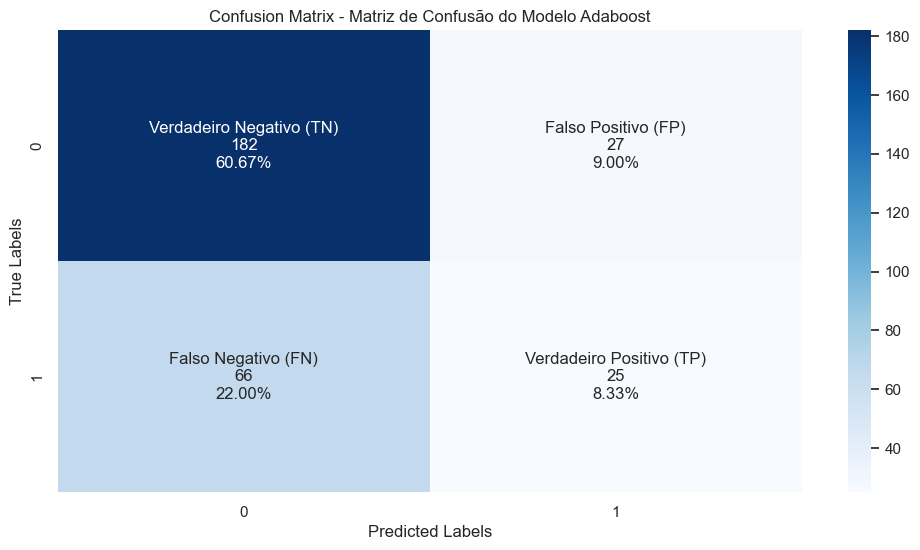

In [137]:
cm = confusion_matrix(y_test, modelo_ada.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo Adaboost') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (66 + 25) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (182 + 27) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **25** observações Verdadeiro Positivo. Ou seja, observações que o Modelo AdaBoost previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **27** observações Falso Positivo. Ou seja, observações que o Modelo AdaBoost previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **182** observações Verdadeiro Negativo. Ou seja, observações que o Modelo AdaBoost previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **66** observações Falso Negativo. Ou seja, observações que o Modelo AdaBoost previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.

#### Curva ROC do Modelo AdaBoost

In [140]:
# Calculando a Curva ROC
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, ypred_proba_test_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

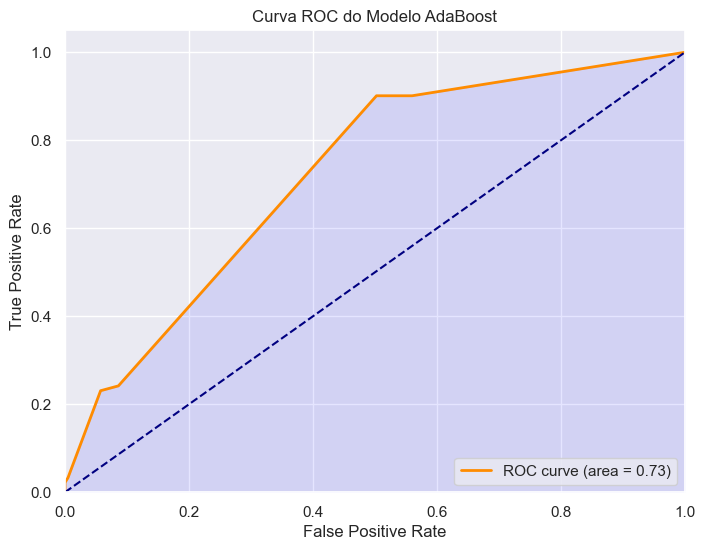

In [141]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo AdaBoost')
plt.legend(loc='lower right')
plt.fill_between(fpr_dt,tpr_dt,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

#### Métricas de Desempenho do modelo AdaBoost

In [143]:
# Métricas de Desempenho
acc_train_ada = accuracy_score(y_train, ypred_train_ada)
acc_test_ada = accuracy_score(y_test, ypred_test_ada)
    
roc_train_ada = roc_auc_score(y_train, ypred_proba_train_ada)
roc_test_ada = roc_auc_score(y_test, ypred_proba_test_ada)
    
prec_train_ada = precision_score(y_train, ypred_train_ada, zero_division=0)
prec_test_ada = precision_score(y_test, ypred_test_ada, zero_division=0)
    
recl_train_ada = recall_score(y_train, ypred_train_ada)
recl_test_ada = recall_score(y_test, ypred_test_ada)
    
f1_train_ada = f1_score(y_train, ypred_train_ada)
f1_test_ada = f1_score(y_test, ypred_test_ada)

In [144]:
desemp_ada = pd.DataFrame({'Treino':[acc_train_ada, roc_train_ada, 
                                        prec_train_ada, recl_train_ada, f1_train_ada],
                              'Teste':[acc_test_ada, roc_test_ada,
                                       prec_test_ada, recl_test_ada, f1_test_ada]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_ada['Variação %'] = round(desemp_ada['Teste'] / desemp_ada['Treino'] - 1, 2)*100

In [145]:
desemp_ada

,Treino,Teste,Variação %
Acurácia,0.771429,0.690000,-11.0
AUROC,0.815546,0.729087,-11.0
Precision,0.696000,0.480769,-31.0
Recall,0.416268,0.274725,-34.0
F1,0.520958,0.349650,-33.0


### Ensemble: *Boosting* - **Gradient Boosting**

In [147]:
modelo_gb = GradientBoostingClassifier(n_estimators=100,
                                       learning_rate = 0.4,
                                       subsample=0.2,
                                       min_samples_leaf=10,
                                       max_depth=2,
                                       random_state = 42)

In [148]:
# Ajuste do modelo
modelo_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=2, min_samples_leaf=10,
                           random_state=42, subsample=0.2)

In [149]:
# Cálculo dos valores preditos
ypred_train_gb = modelo_gb.predict(x_train)
ypred_proba_train_gb = modelo_gb.predict_proba(x_train)[:,1]

ypred_test_gb = modelo_gb.predict(x_test)
ypred_proba_test_gb = modelo_gb.predict_proba(x_test)[:,1]

#### Matriz de Confusão do Modelo Gradient Boosting

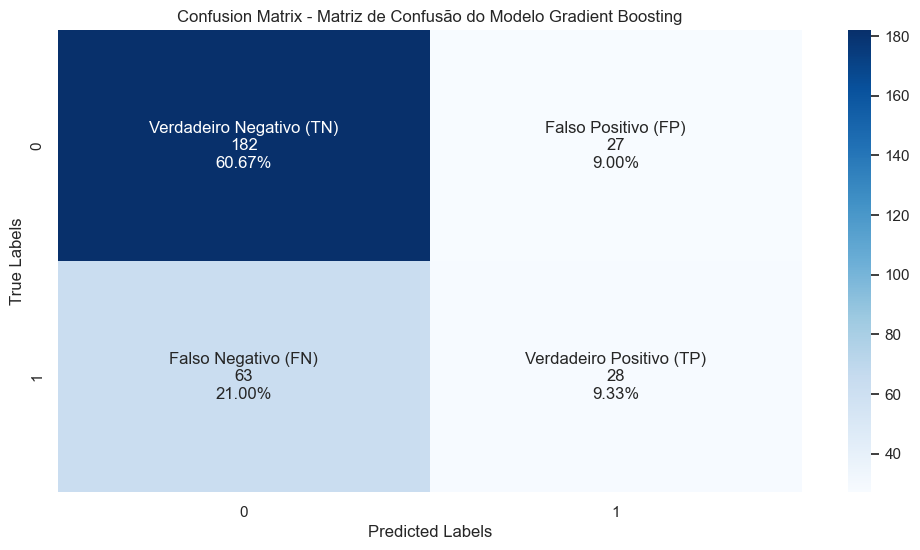

In [151]:
cm = confusion_matrix(y_test, modelo_gb.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo Gradient Boosting') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (63 + 28) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (182 + 27) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **28** observações Verdadeiro Positivo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **27** observações Falso Positivo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **182** observações Verdadeiro Negativo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **63** observações Falso Negativo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.

#### Curva ROC do Modelo Gradient Boosting

In [154]:
# Calculando a Curva ROC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, ypred_proba_test_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

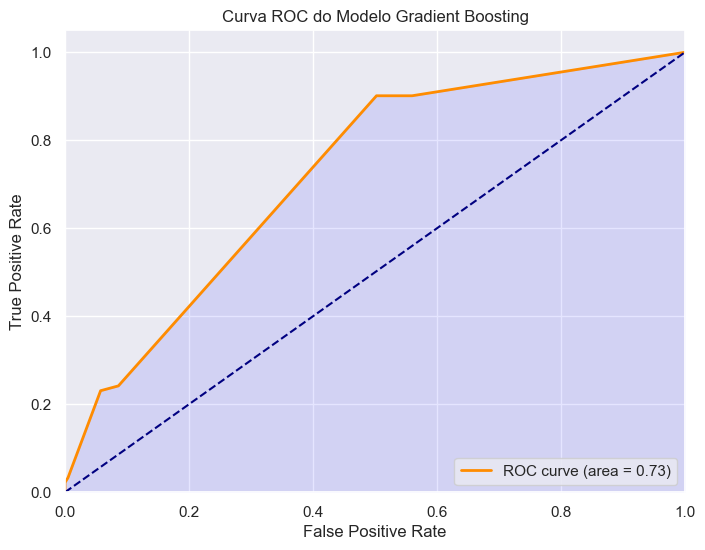

In [155]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo Gradient Boosting')
plt.legend(loc='lower right')
plt.fill_between(fpr_dt,tpr_dt,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

#### Métricas de Desempenho do Modelo Gradient Boosting

In [157]:
# Métricas de Desempenho
acc_train_gb = accuracy_score(y_train, ypred_train_gb)
acc_test_gb = accuracy_score(y_test, ypred_test_gb)
    
roc_train_gb = roc_auc_score(y_train, ypred_proba_train_gb)
roc_test_gb = roc_auc_score(y_test, ypred_proba_test_gb)
    
prec_train_gb = precision_score(y_train, ypred_train_gb, zero_division=0)
prec_test_gb = precision_score(y_test, ypred_test_gb, zero_division=0)
    
recl_train_gb = recall_score(y_train, ypred_train_gb)
recl_test_gb = recall_score(y_test, ypred_test_gb)
    
f1_train_gb = f1_score(y_train, ypred_train_gb)
f1_test_gb = f1_score(y_test, ypred_test_gb)

In [158]:
desemp_gb = pd.DataFrame({'Treino':[acc_train_gb, roc_train_gb, 
                                        prec_train_gb, recl_train_gb, f1_train_gb],
                              'Teste':[acc_test_gb, roc_test_gb,
                                       prec_test_gb, recl_test_gb, f1_test_gb]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_gb['Variação %'] = round(desemp_gb['Teste'] / desemp_gb['Treino'] - 1, 2)*100

In [159]:
desemp_gb

,Treino,Teste,Variação %
Acurácia,0.811429,0.700000,-14.0
AUROC,0.843275,0.731532,-13.0
Precision,0.722543,0.509091,-30.0
Recall,0.598086,0.307692,-49.0
F1,0.654450,0.383562,-41.0


### Ensemble: *Boosting* - **XG Boost**

In [161]:
modelo_xgb = XGBClassifier(n_estimators=100,
                          learning_rate = 0.4,
                          max_depth=3,
                          random_state = 42)

In [162]:
# Ajuste do modelo
modelo_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [163]:
# Cálculo dos valores preditos
ypred_train_xgb = modelo_xgb.predict(x_train)
ypred_proba_train_xgb = modelo_xgb.predict_proba(x_train)[:,1]

ypred_test_xgb = modelo_xgb.predict(x_test)
ypred_proba_test_xgb = modelo_xgb.predict_proba(x_test)[:,1]

#### Matriz de Confusão do Modelo XG Boost

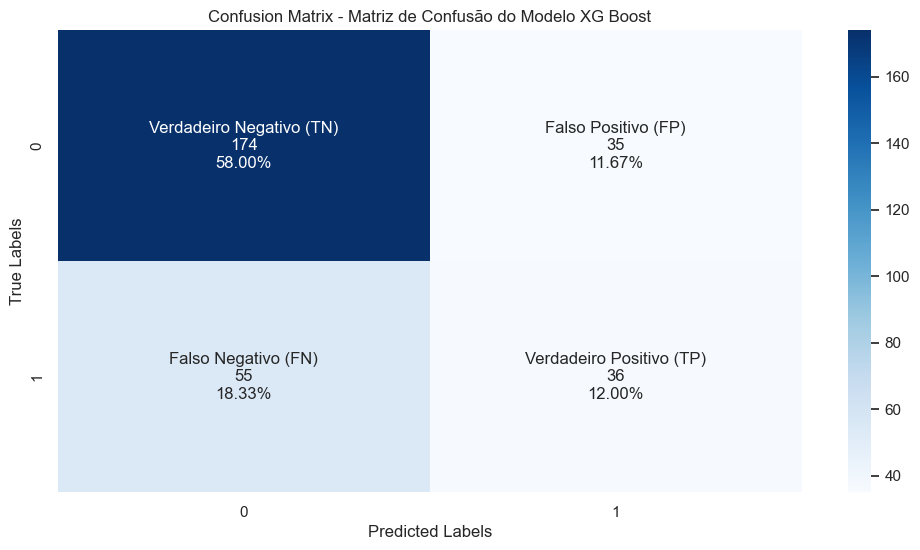

In [165]:
cm = confusion_matrix(y_test, modelo_xgb.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo XG Boost') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (55 + 36) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (174 + 35) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **36** observações Verdadeiro Positivo. Ou seja, observações que o Modelo XG Boost previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **35** observações Falso Positivo. Ou seja, observações que o Modelo XG Boost previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **174** observações Verdadeiro Negativo. Ou seja, observações que o Modelo XG Boost previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **55** observações Falso Negativo. Ou seja, observações que o Modelo XG Boost previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.

#### Curva ROC do Modelo XG Boost

In [168]:
# Calculando a Curva ROC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, ypred_proba_test_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

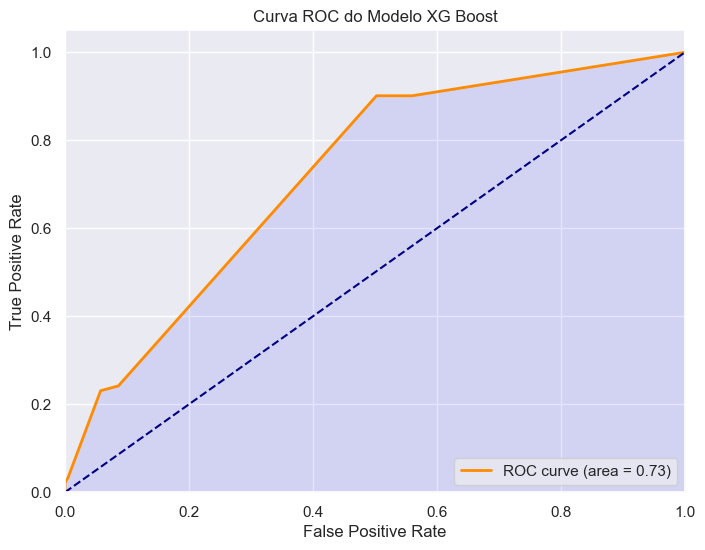

In [169]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo XG Boost')
plt.legend(loc='lower right')
plt.fill_between(fpr_dt,tpr_dt,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

#### Métricas de Desempenho do Modelo XG Boost

In [171]:
# Métricas de Desempenho
acc_train_xgb = accuracy_score(y_train, ypred_train_xgb)
acc_test_xgb = accuracy_score(y_test, ypred_test_xgb)
    
roc_train_xgb = roc_auc_score(y_train, ypred_proba_train_xgb)
roc_test_xgb = roc_auc_score(y_test, ypred_proba_test_xgb)
    
prec_train_xgb = precision_score(y_train, ypred_train_xgb, zero_division=0)
prec_test_xgb = precision_score(y_test, ypred_test_xgb, zero_division=0)
    
recl_train_xgb = recall_score(y_train, ypred_train_xgb)
recl_test_xgb = recall_score(y_test, ypred_test_xgb)
    
f1_train_xgb = f1_score(y_train, ypred_train_xgb)
f1_test_xgb = f1_score(y_test, ypred_test_xgb)

In [172]:
desemp_xgb = pd.DataFrame({'Treino':[acc_train_xgb, roc_train_xgb, 
                                        prec_train_xgb, recl_train_xgb, f1_train_xgb],
                              'Teste':[acc_test_xgb, roc_test_xgb,
                                       prec_test_xgb, recl_test_xgb, f1_test_xgb]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_xgb['Variação %'] = round(desemp_xgb['Teste'] / desemp_xgb['Treino'] - 1, 2)*100

In [173]:
desemp_xgb

,Treino,Teste,Variação %
Acurácia,0.957143,0.700000,-27.0
AUROC,0.988774,0.728745,-26.0
Precision,0.973545,0.507042,-48.0
Recall,0.880383,0.395604,-55.0
F1,0.924623,0.444444,-52.0


## Comparando o desempenho dos modelos

### Desempenho do Modelo de Regressão Logística

In [176]:
desemp_rl

,Treino,Teste,Variação %
Acurácia,0.754286,0.740000,-2.0
AUROC,0.764050,0.766970,0.0
Precision,0.643411,0.627451,-2.0
Recall,0.397129,0.351648,-11.0
F1,0.491124,0.450704,-8.0


### Desempenho do Modelo de Árvore de Decisão

In [178]:
desemp_dt

,Treino,Teste,Variação %
Acurácia,0.754286,0.710000,-6.0
AUROC,0.739668,0.721883,-2.0
Precision,0.703297,0.550000,-22.0
Recall,0.306220,0.241758,-21.0
F1,0.426667,0.335878,-21.0


### Desempenho do Modelo de Bagging Regressão Logística

In [180]:
desemp_bagging

,Treino,Teste,Variação %
Acurácia,0.722857,0.720000,-0.0
AUROC,0.764196,0.762290,-0.0
Precision,0.641509,0.652174,2.0
Recall,0.162679,0.164835,1.0
F1,0.259542,0.263158,1.0


### Desempenho do Modelo de Random Forest

In [182]:
desemp_rf

,Treino,Teste,Variação %
Acurácia,0.740000,0.720000,-3.0
AUROC,0.798259,0.775383,-3.0
Precision,0.885714,0.769231,-13.0
Recall,0.148325,0.109890,-26.0
F1,0.254098,0.192308,-24.0


### Desempenho do Modelo AdaBoost

In [184]:
desemp_ada

,Treino,Teste,Variação %
Acurácia,0.771429,0.690000,-11.0
AUROC,0.815546,0.729087,-11.0
Precision,0.696000,0.480769,-31.0
Recall,0.416268,0.274725,-34.0
F1,0.520958,0.349650,-33.0


### Desempenho do Modelo Gradient Boosting

In [186]:
desemp_gb

,Treino,Teste,Variação %
Acurácia,0.811429,0.700000,-14.0
AUROC,0.843275,0.731532,-13.0
Precision,0.722543,0.509091,-30.0
Recall,0.598086,0.307692,-49.0
F1,0.654450,0.383562,-41.0


### Desempenho do Modelo XG Boost

In [188]:
desemp_xgb

,Treino,Teste,Variação %
Acurácia,0.957143,0.700000,-27.0
AUROC,0.988774,0.728745,-26.0
Precision,0.973545,0.507042,-48.0
Recall,0.880383,0.395604,-55.0
F1,0.924623,0.444444,-52.0


### Medida a ser escolhida para avaliação do desempenho dos modelos

Uma vez que a empresa está com a grande preocupação de ter o mínimo de inadimplência possível, de reduzir o seu risco de crédito e dado o potencial de prejuízo que ela pode ter ao emprestar para clientes que se tornarão inadimplentes, **iremos utilizar a Métrica Recall como principal medida de avaliação do desempenho dos Modelos**, uma vez que o Recall nos mostrará o nível de assertividade do Modelo em prever os possíveis clientes que se tornarão inadimplentes. 

Caso a empresa estivesse em uma estratégia de ganho de participação de mercado e estivesse menos focada em reduzir o seu nível de inadimplência, o Precision poderia ser uma métrica mais indicada para avaliar a performance dos modelos, uma vez que quanto maior for o Precision, menor será a quantidade de *bons* clientes para quem a empresa deixará de emprestar.

## Tunagem dos Hiperparâmetros dos Modelos

Agora iremos realizar a tunagem de Hiperparâmetros de todos os 7 modelos trabalhados até aqui, afim de aumentar ainda mais os seus desempenhos, tomando a medida Recall como referência. Ou seja, iremos buscar a configuração de Hiperparâmetros de cada um desses 7 modelos que otimize a medida de perfomance Recall.

**Para tunar os Hiperparâmetros iremos utilizar metodologia Bayesian Search**, que é mais performática que a metodologia Grid Search

In [193]:
# Importando as bibliotecas
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
import optuna
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
recall_scorer = make_scorer(recall_score, average='binary')

### Tunagem dos Hiperparâmetros da Regressão Logística

In [195]:
# Definindo nossa função objetivo
def objective_rl(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    max_iter_rl = trial.suggest_int('max_iter', 100, 500)
            
    # Criando, treinando e retornando o resultado do modelo
    modelo_rl = LogisticRegression(max_iter = max_iter_rl, random_state = 42)
    score_rl = cross_val_score(estimator = modelo_rl, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_rl

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_rl = optuna.create_study(direction = 'maximize')
study_rl.optimize(objective_rl, n_trials = 50)

# Melhores hiperpaâmetros encontrados
best_params_rl = study_rl.best_params
print(best_params_rl)

[I 2024-08-02 11:45:59,866] A new study created in memory with name: no-name-f4d1851a-f427-4c63-95db-00bb2961ad63
[I 2024-08-02 11:46:00,703] Trial 0 finished with value: 0.38764665286404415 and parameters: {'max_iter': 181}. Best is trial 0 with value: 0.38764665286404415.
[I 2024-08-02 11:46:01,426] Trial 1 finished with value: 0.38764665286404415 and parameters: {'max_iter': 299}. Best is trial 0 with value: 0.38764665286404415.
[I 2024-08-02 11:46:02,094] Trial 2 finished with value: 0.38764665286404415 and parameters: {'max_iter': 242}. Best is trial 0 with value: 0.38764665286404415.
[I 2024-08-02 11:46:02,134] Trial 3 finished with value: 0.38764665286404415 and parameters: {'max_iter': 138}. Best is trial 0 with value: 0.38764665286404415.
[I 2024-08-02 11:46:02,181] Trial 4 finished with value: 0.38764665286404415 and parameters: {'max_iter': 179}. Best is trial 0 with value: 0.38764665286404415.
[I 2024-08-02 11:46:02,229] Trial 5 finished with value: 0.38764665286404415 and 

{'max_iter': 181}


In [196]:
# Avaliando o modelo com os melhores parâmetros 
modelo_rl_tunado = LogisticRegression(**best_params_rl, random_state = 42)
modelo_rl_tunado.fit(x_train, y_train)
y_pred_proba = modelo_rl_tunado.predict_proba(x_test)[:, 1]

In [197]:
# Cálculo dos valores preditos
ypred_train_rl_tunado = modelo_rl_tunado.predict(x_train)
ypred_proba_train_rl_tunado = modelo_rl_tunado.predict_proba(x_train)[:,1]

ypred_test_rl_tunado = modelo_rl_tunado.predict(x_test)
ypred_proba_test_rl_tunado = modelo_rl_tunado.predict_proba(x_test)[:,1]

In [198]:
# Métricas de Desempenho
acc_train_rl_tunado = accuracy_score(y_train, ypred_train_rl_tunado)
acc_test_rl_tunado = accuracy_score(y_test, ypred_test_rl_tunado)
    
roc_train_rl_tunado = roc_auc_score(y_train, ypred_proba_train_rl_tunado)
roc_test_rl_tunado = roc_auc_score(y_test, ypred_proba_test_rl_tunado)
    
prec_train_rl_tunado = precision_score(y_train, ypred_train_rl_tunado, zero_division=0)
prec_test_rl_tunado = precision_score(y_test, ypred_test_rl_tunado, zero_division=0)
    
recl_train_rl_tunado = recall_score(y_train, ypred_train_rl_tunado)
recl_test_rl_tunado = recall_score(y_test, ypred_test_rl_tunado)
    
f1_train_rl_tunado = f1_score(y_train, ypred_train_rl_tunado)
f1_test_rl_tunado = f1_score(y_test, ypred_test_rl_tunado)

In [199]:
desemp_rl_tunado = pd.DataFrame({'Treino':[acc_train_rl_tunado, roc_train_rl_tunado, 
                                        prec_train_rl_tunado, recl_train_rl_tunado, f1_train_rl_tunado],
                              'Teste':[acc_test_rl_tunado, roc_test_rl_tunado,
                                       prec_test_rl_tunado, recl_test_rl_tunado, f1_test_rl_tunado]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_rl_tunado['Variação %'] = round(desemp_rl_tunado['Teste'] / desemp_rl_tunado['Treino'] - 1, 2)*100

In [200]:
desemp_rl_tunado

,Treino,Teste,Variação %
Acurácia,0.754286,0.740000,-2.0
AUROC,0.764050,0.766970,0.0
Precision,0.643411,0.627451,-2.0
Recall,0.397129,0.351648,-11.0
F1,0.491124,0.450704,-8.0


### Tunagem dos Hiperparâmetros da Árvore de Decisão

In [202]:
# Definindo nossa função objetivo
def objective_dt(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    min_samples_leaf_dt = trial.suggest_int('min_samples_leaf', 2, 8)
    max_depth_dt = trial.suggest_int('max_depth', 2, 6)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_dt = DecisionTreeClassifier(min_samples_leaf= min_samples_leaf_dt, max_depth = max_depth_dt, random_state = 42)
    score_dt = cross_val_score(estimator = modelo_dt, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_dt

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_dt = optuna.create_study(direction = 'maximize')
study_dt.optimize(objective_dt, n_trials = 150)

# Melhores hiperpaâmetros encontrados
best_params_dt = study_dt.best_params
print(best_params_dt)

[I 2024-08-02 11:46:04,782] A new study created in memory with name: no-name-d0bd50e2-12eb-42d0-8983-ac5b1b839071
[I 2024-08-02 11:46:04,812] Trial 0 finished with value: 0.329951690821256 and parameters: {'min_samples_leaf': 3, 'max_depth': 4}. Best is trial 0 with value: 0.329951690821256.
[I 2024-08-02 11:46:04,839] Trial 1 finished with value: 0.3489993098688751 and parameters: {'min_samples_leaf': 7, 'max_depth': 5}. Best is trial 1 with value: 0.3489993098688751.
[I 2024-08-02 11:46:04,866] Trial 2 finished with value: 0.311456176673568 and parameters: {'min_samples_leaf': 8, 'max_depth': 2}. Best is trial 1 with value: 0.3489993098688751.
[I 2024-08-02 11:46:04,892] Trial 3 finished with value: 0.38737060041407867 and parameters: {'min_samples_leaf': 3, 'max_depth': 6}. Best is trial 3 with value: 0.38737060041407867.
[I 2024-08-02 11:46:04,919] Trial 4 finished with value: 0.36811594202898545 and parameters: {'min_samples_leaf': 8, 'max_depth': 6}. Best is trial 3 with value: 0

{'min_samples_leaf': 5, 'max_depth': 6}


In [203]:
# Avaliando o modelo com os melhores parâmetros 
modelo_dt_tunado = DecisionTreeClassifier(**best_params_dt, random_state = 42)
modelo_dt_tunado.fit(x_train, y_train)
y_pred_proba = modelo_dt_tunado.predict_proba(x_test)[:, 1]

In [204]:
# Cálculo dos valores preditos
ypred_train_dt_tunado = modelo_dt_tunado.predict(x_train)
ypred_proba_train_dt_tunado = modelo_dt_tunado.predict_proba(x_train)[:,1]

ypred_test_dt_tunado = modelo_dt_tunado.predict(x_test)
ypred_proba_test_dt_tunado = modelo_dt_tunado.predict_proba(x_test)[:,1]

In [205]:
# Métricas de Desempenho
acc_train_dt_tunado = accuracy_score(y_train, ypred_train_dt_tunado)
acc_test_dt_tunado = accuracy_score(y_test, ypred_test_dt_tunado)
    
roc_train_dt_tunado = roc_auc_score(y_train, ypred_proba_train_dt_tunado)
roc_test_dt_tunado = roc_auc_score(y_test, ypred_proba_test_dt_tunado)
    
prec_train_dt_tunado = precision_score(y_train, ypred_train_dt_tunado, zero_division=0)
prec_test_dt_tunado = precision_score(y_test, ypred_test_dt_tunado, zero_division=0)
    
recl_train_dt_tunado = recall_score(y_train, ypred_train_dt_tunado)
recl_test_dt_tunado = recall_score(y_test, ypred_test_dt_tunado)
    
f1_train_dt_tunado = f1_score(y_train, ypred_train_dt_tunado)
f1_test_dt_tunado = f1_score(y_test, ypred_test_dt_tunado)

In [206]:
desemp_dt_tunado = pd.DataFrame({'Treino':[acc_train_dt_tunado, roc_train_dt_tunado, 
                                        prec_train_dt_tunado, recl_train_dt_tunado, f1_train_dt_tunado],
                              'Teste':[acc_test_dt_tunado, roc_test_dt_tunado,
                                       prec_test_dt_tunado, recl_test_dt_tunado, f1_test_dt_tunado]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_dt_tunado['Variação %'] = round(desemp_dt_tunado['Teste'] / desemp_dt_tunado['Treino'] - 1, 2)*100

In [207]:
desemp_dt_tunado

,Treino,Teste,Variação %
Acurácia,0.797143,0.693333,-13.0
AUROC,0.838928,0.690310,-18.0
Precision,0.705521,0.492537,-30.0
Recall,0.550239,0.362637,-34.0
F1,0.618280,0.417722,-32.0


### Tunagem dos Hiperparâmetros do Bagging de Regressão Logística

In [209]:
# Definindo nossa função objetivo
def objective_bagging(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_bagging = trial.suggest_int('n_estimators', 50, 200)
    max_samples_bagging = trial.suggest_float('max_samples', 0.5,1)
    max_features_bagging = trial.suggest_float('max_features', 0.5,1)
        
    # Criando, treinando e retornando o resultado do modelo
    modelo_bagging = BaggingClassifier(estimator = modelo_base, n_estimators = n_estimators_bagging, max_samples= max_samples_bagging, max_features = max_features_bagging, random_state = 42)
    score_bagging = cross_val_score(estimator = modelo_bagging, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_bagging

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_bagging = optuna.create_study(direction = 'maximize')
study_bagging.optimize(objective_bagging, n_trials = 100)

# Melhores hiperpaâmetros encontrados
best_params_bagging = study_bagging.best_params
print(best_params_bagging)

[I 2024-08-02 11:46:11,925] A new study created in memory with name: no-name-59f0644c-e36d-4a63-897e-01c91aeddc2a
[I 2024-08-02 11:46:14,855] Trial 0 finished with value: 0.3682539682539683 and parameters: {'n_estimators': 115, 'max_samples': 0.6581232697270301, 'max_features': 0.9598605986752478}. Best is trial 0 with value: 0.3682539682539683.
[I 2024-08-02 11:46:19,582] Trial 1 finished with value: 0.315527950310559 and parameters: {'n_estimators': 198, 'max_samples': 0.6037437954052807, 'max_features': 0.8161084426535695}. Best is trial 0 with value: 0.3682539682539683.
[I 2024-08-02 11:46:22,993] Trial 2 finished with value: 0.2582470669427191 and parameters: {'n_estimators': 158, 'max_samples': 0.976489384383364, 'max_features': 0.6580281993443124}. Best is trial 0 with value: 0.3682539682539683.
[I 2024-08-02 11:46:24,198] Trial 3 finished with value: 0.16742581090407174 and parameters: {'n_estimators': 66, 'max_samples': 0.6287182672751745, 'max_features': 0.5491376329384654}. 

{'n_estimators': 68, 'max_samples': 0.8164383881452313, 'max_features': 0.9988643640321866}


In [210]:
# Avaliando o modelo com os melhores parâmetros 
modelo_bagging_tunado = BaggingClassifier(**best_params_bagging, random_state = 42)
modelo_bagging_tunado.fit(x_train, y_train)
y_pred_proba = modelo_bagging_tunado.predict_proba(x_test)[:, 1]

In [211]:
# Cálculo dos valores preditos
ypred_train_bagging_tunado = modelo_bagging_tunado.predict(x_train)
ypred_proba_train_bagging_tunado = modelo_bagging_tunado.predict_proba(x_train)[:,1]

ypred_test_bagging_tunado = modelo_bagging_tunado.predict(x_test)
ypred_proba_test_bagging_tunado = modelo_bagging_tunado.predict_proba(x_test)[:,1]

In [212]:
# Métricas de Desempenho
acc_train_bagging_tunado = accuracy_score(y_train, ypred_train_bagging_tunado)
acc_test_bagging_tunado = accuracy_score(y_test, ypred_test_bagging_tunado)
    
roc_train_bagging_tunado = roc_auc_score(y_train, ypred_proba_train_bagging_tunado)
roc_test_bagging_tunado = roc_auc_score(y_test, ypred_proba_test_bagging_tunado)
    
prec_train_bagging_tunado = precision_score(y_train, ypred_train_bagging_tunado, zero_division=0)
prec_test_bagging_tunado = precision_score(y_test, ypred_test_bagging_tunado, zero_division=0)
    
recl_train_bagging_tunado = recall_score(y_train, ypred_train_bagging_tunado)
recl_test_bagging_tunado = recall_score(y_test, ypred_test_bagging_tunado)
    
f1_train_bagging_tunado = f1_score(y_train, ypred_train_bagging_tunado)
f1_test_bagging_tunado = f1_score(y_test, ypred_test_bagging_tunado)

In [213]:
desemp_bagging_tunado = pd.DataFrame({'Treino':[acc_train_bagging_tunado, roc_train_bagging_tunado, 
                                        prec_train_bagging_tunado, recl_train_bagging_tunado, f1_train_bagging_tunado],
                              'Teste':[acc_test_bagging_tunado, roc_test_bagging_tunado,
                                       prec_test_bagging_tunado, recl_test_bagging_tunado, f1_test_bagging_tunado]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_bagging_tunado['Variação %'] = round(desemp_bagging_tunado['Teste'] / desemp_bagging_tunado['Treino'] - 1, 2)*100

In [214]:
desemp_bagging_tunado

,Treino,Teste,Variação %
Acurácia,0.998571,0.730000,-27.0
AUROC,1.000000,0.714338,-29.0
Precision,1.000000,0.589286,-41.0
Recall,0.995215,0.362637,-64.0
F1,0.997602,0.448980,-55.0


### Tunagem dos Hiperparâmetros da Random Forest

In [216]:
# Definindo nossa função objetivo
def objective_rf(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_rf = trial.suggest_int('n_estimators', 100, 300)
    min_samples_leaf_rf = trial.suggest_int('min_samples_leaf', 3, 10)
    max_depth_rf = trial.suggest_int('max_depth', 2, 6)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_rf = RandomForestClassifier(n_estimators = n_estimators_rf, min_samples_leaf= min_samples_leaf_rf, max_depth = max_depth_rf, random_state = 42)
    score_rf = cross_val_score(estimator = modelo_rf, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_rf

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_rf = optuna.create_study(direction = 'maximize')
study_rf.optimize(objective_rf, n_trials = 100)

# Melhores hiperpaâmetros encontrados
best_params_rf = study_rf.best_params
print(best_params_rf)

[I 2024-08-02 11:49:56,608] A new study created in memory with name: no-name-2a102e8a-af31-4071-b1ba-7edf9673e4b1
[I 2024-08-02 11:49:56,947] Trial 0 finished with value: 0.17204968944099377 and parameters: {'n_estimators': 171, 'min_samples_leaf': 10, 'max_depth': 4}. Best is trial 0 with value: 0.17204968944099377.
[I 2024-08-02 11:49:57,307] Trial 1 finished with value: 0.18171152518978606 and parameters: {'n_estimators': 192, 'min_samples_leaf': 4, 'max_depth': 4}. Best is trial 1 with value: 0.18171152518978606.
[I 2024-08-02 11:49:57,688] Trial 2 finished with value: 0.1864734299516908 and parameters: {'n_estimators': 175, 'min_samples_leaf': 3, 'max_depth': 4}. Best is trial 2 with value: 0.1864734299516908.
[I 2024-08-02 11:49:58,032] Trial 3 finished with value: 0.21987577639751552 and parameters: {'n_estimators': 168, 'min_samples_leaf': 10, 'max_depth': 6}. Best is trial 3 with value: 0.21987577639751552.
[I 2024-08-02 11:49:58,375] Trial 4 finished with value: 0.17211870255

{'n_estimators': 116, 'min_samples_leaf': 3, 'max_depth': 6}


In [217]:
# Avaliando o modelo com os melhores parâmetros 
modelo_rf_tunado = RandomForestClassifier(**best_params_rf, random_state = 42)
modelo_rf_tunado.fit(x_train, y_train)
y_pred_proba = modelo_rf_tunado.predict_proba(x_test)[:, 1]

In [218]:
# Cálculo dos valores preditos
ypred_train_rf_tunado = modelo_rf_tunado.predict(x_train)
ypred_proba_train_rf_tunado = modelo_rf_tunado.predict_proba(x_train)[:,1]

ypred_test_rf_tunado = modelo_rf_tunado.predict(x_test)
ypred_proba_test_rf_tunado = modelo_rf_tunado.predict_proba(x_test)[:,1]

In [219]:
# Métricas de Desempenho
acc_train_rf_tunado = accuracy_score(y_train, ypred_train_rf_tunado)
acc_test_rf_tunado = accuracy_score(y_test, ypred_test_rf_tunado)
    
roc_train_rf_tunado = roc_auc_score(y_train, ypred_proba_train_rf_tunado)
roc_test_rf_tunado = roc_auc_score(y_test, ypred_proba_test_rf_tunado)
    
prec_train_rf_tunado = precision_score(y_train, ypred_train_rf_tunado, zero_division=0)
prec_test_rf_tunado = precision_score(y_test, ypred_test_rf_tunado, zero_division=0)
    
recl_train_rf_tunado = recall_score(y_train, ypred_train_rf_tunado)
recl_test_rf_tunado = recall_score(y_test, ypred_test_rf_tunado)
    
f1_train_rf_tunado = f1_score(y_train, ypred_train_rf_tunado)
f1_test_rf_tunado = f1_score(y_test, ypred_test_rf_tunado)

In [220]:
desemp_rf_tunado = pd.DataFrame({'Treino':[acc_train_rf_tunado, roc_train_rf_tunado, 
                                        prec_train_rf_tunado, recl_train_rf_tunado, f1_train_rf_tunado],
                              'Teste':[acc_test_rf_tunado, roc_test_rf_tunado,
                                       prec_test_rf_tunado, recl_test_rf_tunado, f1_test_rf_tunado]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_rf_tunado['Variação %'] = round(desemp_rf_tunado['Teste'] / desemp_rf_tunado['Treino'] - 1, 2)*100

In [221]:
desemp_rf_tunado

,Treino,Teste,Variação %
Acurácia,0.821429,0.733333,-11.0
AUROC,0.889572,0.772280,-13.0
Precision,0.903846,0.689655,-24.0
Recall,0.449761,0.219780,-51.0
F1,0.600639,0.333333,-45.0


### Tunagem dos Hiperparâmetros do Modelo Adaboost

In [223]:
# Definindo nossa função objetivo
def objective_ada(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_ada = trial.suggest_int('n_estimators', 10, 500)
    learning_rate_ada = trial.suggest_float('learning_rate', 0.01,0.99)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_ada = AdaBoostClassifier(n_estimators = n_estimators_ada, learning_rate = learning_rate_ada, random_state = 42)
    score_ada = cross_val_score(estimator = modelo_ada, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_ada

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_ada = optuna.create_study(direction = 'maximize')
study_ada.optimize(objective_ada, n_trials = 100)

# Melhores hiperpaâmetros encontrados
best_params_ada = study_ada.best_params
print(best_params_ada)

[I 2024-08-02 11:50:54,576] A new study created in memory with name: no-name-c75c6405-19fb-49a8-8ee7-0e0f8fe4b4b6
[I 2024-08-02 11:50:56,583] Trial 0 finished with value: 0.40158730158730166 and parameters: {'n_estimators': 488, 'learning_rate': 0.21495543369628242}. Best is trial 0 with value: 0.40158730158730166.
[I 2024-08-02 11:50:57,052] Trial 1 finished with value: 0.4065562456866805 and parameters: {'n_estimators': 117, 'learning_rate': 0.5283627181504779}. Best is trial 1 with value: 0.4065562456866805.
[I 2024-08-02 11:50:58,374] Trial 2 finished with value: 0.4159420289855072 and parameters: {'n_estimators': 349, 'learning_rate': 0.6338074403250008}. Best is trial 2 with value: 0.4159420289855072.
[I 2024-08-02 11:50:58,631] Trial 3 finished with value: 0.2488612836438923 and parameters: {'n_estimators': 62, 'learning_rate': 0.1612843941740919}. Best is trial 2 with value: 0.4159420289855072.
[I 2024-08-02 11:51:00,153] Trial 4 finished with value: 0.4063492063492064 and para

{'n_estimators': 167, 'learning_rate': 0.966417961806424}


In [224]:
# Avaliando o modelo com os melhores parâmetros 
modelo_ada_tunado = AdaBoostClassifier(**best_params_ada, random_state = 42)
modelo_ada_tunado.fit(x_train, y_train)
y_pred_proba = modelo_ada_tunado.predict_proba(x_test)[:, 1]

In [225]:
# Cálculo dos valores preditos
ypred_train_ada_tunado = modelo_ada_tunado.predict(x_train)
ypred_proba_train_ada_tunado = modelo_ada_tunado.predict_proba(x_train)[:,1]

ypred_test_ada_tunado = modelo_ada_tunado.predict(x_test)
ypred_proba_test_ada_tunado = modelo_ada_tunado.predict_proba(x_test)[:,1]

In [226]:
# Métricas de Desempenho
acc_train_ada_tunado = accuracy_score(y_train, ypred_train_ada_tunado)
acc_test_ada_tunado = accuracy_score(y_test, ypred_test_ada_tunado)
    
roc_train_ada_tunado = roc_auc_score(y_train, ypred_proba_train_ada_tunado)
roc_test_ada_tunado = roc_auc_score(y_test, ypred_proba_test_ada_tunado)
    
prec_train_ada_tunado = precision_score(y_train, ypred_train_ada_tunado, zero_division=0)
prec_test_ada_tunado = precision_score(y_test, ypred_test_ada_tunado, zero_division=0)
    
recl_train_ada_tunado = recall_score(y_train, ypred_train_ada_tunado)
recl_test_ada_tunado = recall_score(y_test, ypred_test_ada_tunado)
    
f1_train_ada_tunado = f1_score(y_train, ypred_train_ada_tunado)
f1_test_ada_tunado = f1_score(y_test, ypred_test_ada_tunado)

In [227]:
desemp_ada_tunado = pd.DataFrame({'Treino':[acc_train_ada_tunado, roc_train_ada_tunado, 
                                        prec_train_ada_tunado, recl_train_ada_tunado, f1_train_ada_tunado],
                              'Teste':[acc_test_ada_tunado, roc_test_ada_tunado,
                                       prec_test_ada_tunado, recl_test_ada_tunado, f1_test_ada_tunado]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_ada_tunado['Variação %'] = round(desemp_ada_tunado['Teste'] / desemp_ada_tunado['Treino'] - 1, 2)*100

In [228]:
desemp_ada_tunado

,Treino,Teste,Variação %
Acurácia,0.821429,0.703333,-14.0
AUROC,0.867705,0.669278,-23.0
Precision,0.780000,0.517241,-34.0
Recall,0.559809,0.329670,-41.0
F1,0.651811,0.402685,-38.0


### Tunagem dos Hiperparâmetros do Modelo Gradient Boosting

In [230]:
# Definindo nossa função objetivo
def objective_gb(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_gb = trial.suggest_int('n_estimators', 10, 500)
    learning_rate_gb = trial.suggest_float('learning_rate', 0.10,0.99)
    subsample_gb = trial.suggest_float('subsample', 0.1, 1, step = 0.1)
    min_samples_leaf_gb = trial.suggest_int('min_samples_leaf', 3, 15)
    max_depth_gb = trial.suggest_int('max_depth', 2, 3)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_gb = GradientBoostingClassifier(n_estimators = n_estimators_gb, learning_rate = learning_rate_gb, subsample= subsample_gb, min_samples_leaf= min_samples_leaf_gb, max_depth = max_depth_gb, random_state = 42)
    score_gb = cross_val_score(estimator = modelo_gb, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_gb

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_gb = optuna.create_study(direction = 'maximize')
study_gb.optimize(objective_gb, n_trials = 100)

# Melhores hiperpaâmetros encontrados
best_params_gb = study_gb.best_params
print(best_params_gb)

[I 2024-08-02 11:52:19,443] A new study created in memory with name: no-name-d5ad7fb4-7e3c-4c0d-8fa1-75c755b11d5d
[I 2024-08-02 11:52:20,102] Trial 0 finished with value: 0.6375431331953072 and parameters: {'n_estimators': 435, 'learning_rate': 0.8771440395311874, 'subsample': 0.4, 'min_samples_leaf': 9, 'max_depth': 2}. Best is trial 0 with value: 0.6375431331953072.
[I 2024-08-02 11:52:20,984] Trial 1 finished with value: 0.4688060731538992 and parameters: {'n_estimators': 298, 'learning_rate': 0.9643861808062723, 'subsample': 0.7000000000000001, 'min_samples_leaf': 15, 'max_depth': 3}. Best is trial 0 with value: 0.6375431331953072.
[I 2024-08-02 11:52:21,023] Trial 2 finished with value: 0.37798481711525195 and parameters: {'n_estimators': 10, 'learning_rate': 0.9584607065283102, 'subsample': 0.7000000000000001, 'min_samples_leaf': 6, 'max_depth': 2}. Best is trial 0 with value: 0.6375431331953072.
[I 2024-08-02 11:52:21,522] Trial 3 finished with value: 0.4541752933057281 and para

{'n_estimators': 265, 'learning_rate': 0.5840866796491834, 'subsample': 0.1, 'min_samples_leaf': 12, 'max_depth': 3}


In [231]:
# Avaliando o modelo com os melhores parâmetros 
modelo_gb_tunado = GradientBoostingClassifier(**best_params_gb, random_state = 42)
modelo_gb_tunado.fit(x_train, y_train)
y_pred_proba = modelo_gb_tunado.predict_proba(x_test)[:, 1]

In [232]:
# Cálculo dos valores preditos
ypred_train_gb_tunado = modelo_gb_tunado.predict(x_train)
ypred_proba_train_gb_tunado = modelo_gb_tunado.predict_proba(x_train)[:,1]

ypred_test_gb_tunado = modelo_gb_tunado.predict(x_test)
ypred_proba_test_gb_tunado = modelo_gb_tunado.predict_proba(x_test)[:,1]

In [233]:
# Métricas de Desempenho
acc_train_gb_tunado = accuracy_score(y_train, ypred_train_gb_tunado)
acc_test_gb_tunado = accuracy_score(y_test, ypred_test_gb_tunado)
    
roc_train_gb_tunado = roc_auc_score(y_train, ypred_proba_train_gb_tunado)
roc_test_gb_tunado = roc_auc_score(y_test, ypred_proba_test_gb_tunado)
    
prec_train_gb_tunado = precision_score(y_train, ypred_train_gb_tunado, zero_division=0)
prec_test_gb_tunado = precision_score(y_test, ypred_test_gb_tunado, zero_division=0)
    
recl_train_gb_tunado = recall_score(y_train, ypred_train_gb_tunado)
recl_test_gb_tunado = recall_score(y_test, ypred_test_gb_tunado)
    
f1_train_gb_tunado = f1_score(y_train, ypred_train_gb_tunado)
f1_test_gb_tunado = f1_score(y_test, ypred_test_gb_tunado)

In [234]:
desemp_gb_tunado = pd.DataFrame({'Treino':[acc_train_gb_tunado, roc_train_gb_tunado, 
                                        prec_train_gb_tunado, recl_train_gb_tunado, f1_train_gb_tunado],
                              'Teste':[acc_test_gb_tunado, roc_test_gb_tunado,
                                       prec_test_gb_tunado, recl_test_gb_tunado, f1_test_gb_tunado]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_gb_tunado['Variação %'] = round(desemp_gb_tunado['Teste'] / desemp_gb_tunado['Treino'] - 1, 2)*100

In [235]:
desemp_gb_tunado

,Treino,Teste,Variação %
Acurácia,0.431429,0.396667,-8.0
AUROC,0.504020,0.446001,-12.0
Precision,0.301053,0.268041,-11.0
Recall,0.684211,0.571429,-16.0
F1,0.418129,0.364912,-13.0


### Tunagem dos Hiperparâmetros do Modelo XG Boost

In [237]:
# Definindo nossa função objetivo
def objective_xgb(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_xgb = trial.suggest_int('n_estimators', 10, 500)
    learning_rate_xgb = trial.suggest_float('learning_rate', 0.10,0.99)
    max_depth_xgb = trial.suggest_int('max_depth', 2, 5)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_xgb = XGBClassifier(n_estimators = n_estimators_xgb, learning_rate = learning_rate_xgb, max_depth = max_depth_xgb, random_state = 42)
    score_xgb = cross_val_score(estimator = modelo_xgb, X = x_train, y = y_train, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_xgb

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_xgb = optuna.create_study(direction = 'maximize')
study_xgb.optimize(objective_xgb, n_trials = 100)

# Melhores hiperpaâmetros encontrados
best_params_xgb = study_xgb.best_params
print(best_params_xgb)

[I 2024-08-02 11:53:26,594] A new study created in memory with name: no-name-1e9e5005-1f08-442d-b149-aa10e9153ae6
[I 2024-08-02 11:53:26,708] Trial 0 finished with value: 0.4876466528640442 and parameters: {'n_estimators': 27, 'learning_rate': 0.8412953180045202, 'max_depth': 4}. Best is trial 0 with value: 0.4876466528640442.
[I 2024-08-02 11:53:26,852] Trial 1 finished with value: 0.4641131815044859 and parameters: {'n_estimators': 155, 'learning_rate': 0.169892311311675, 'max_depth': 4}. Best is trial 0 with value: 0.4876466528640442.
[I 2024-08-02 11:53:27,056] Trial 2 finished with value: 0.44948240165631476 and parameters: {'n_estimators': 339, 'learning_rate': 0.36051868965187117, 'max_depth': 3}. Best is trial 0 with value: 0.4876466528640442.
[I 2024-08-02 11:53:27,159] Trial 3 finished with value: 0.48778467908902695 and parameters: {'n_estimators': 193, 'learning_rate': 0.36379694999560086, 'max_depth': 3}. Best is trial 3 with value: 0.48778467908902695.
[I 2024-08-02 11:53

{'n_estimators': 253, 'learning_rate': 0.7329939386396042, 'max_depth': 2}


In [238]:
# Avaliando o modelo com os melhores parâmetros 
modelo_xgb_tunado = XGBClassifier(**best_params_xgb, random_state = 42)
modelo_xgb_tunado.fit(x_train, y_train)
y_pred_proba = modelo_xgb_tunado.predict_proba(x_test)[:, 1]

In [239]:
# Cálculo dos valores preditos
ypred_train_xgb_tunado = modelo_xgb_tunado.predict(x_train)
ypred_proba_train_xgb_tunado = modelo_xgb_tunado.predict_proba(x_train)[:,1]

ypred_test_xgb_tunado = modelo_xgb_tunado.predict(x_test)
ypred_proba_test_xgb_tunado = modelo_xgb_tunado.predict_proba(x_test)[:,1]

In [240]:
# Métricas de Desempenho
acc_train_xgb_tunado = accuracy_score(y_train, ypred_train_xgb_tunado)
acc_test_xgb_tunado = accuracy_score(y_test, ypred_test_xgb_tunado)
    
roc_train_xgb_tunado = roc_auc_score(y_train, ypred_proba_train_xgb_tunado)
roc_test_xgb_tunado = roc_auc_score(y_test, ypred_proba_test_xgb_tunado)
    
prec_train_xgb_tunado = precision_score(y_train, ypred_train_xgb_tunado, zero_division=0)
prec_test_xgb_tunado = precision_score(y_test, ypred_test_xgb_tunado, zero_division=0)
    
recl_train_xgb_tunado = recall_score(y_train, ypred_train_xgb_tunado)
recl_test_xgb_tunado = recall_score(y_test, ypred_test_xgb_tunado)
    
f1_train_xgb_tunado = f1_score(y_train, ypred_train_xgb_tunado)
f1_test_xgb_tunado = f1_score(y_test, ypred_test_xgb_tunado)

In [241]:
desemp_xgb_tunado = pd.DataFrame({'Treino':[acc_train_xgb_tunado, roc_train_xgb_tunado, 
                                        prec_train_xgb_tunado, recl_train_xgb_tunado, f1_train_xgb_tunado],
                              'Teste':[acc_test_xgb_tunado, roc_test_xgb_tunado,
                                       prec_test_xgb_tunado, recl_test_xgb_tunado, f1_test_xgb_tunado]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
desemp_xgb_tunado['Variação %'] = round(desemp_xgb_tunado['Teste'] / desemp_xgb_tunado['Treino'] - 1, 2)*100

In [242]:
desemp_xgb_tunado

,Treino,Teste,Variação %
Acurácia,0.964286,0.706667,-27.0
AUROC,0.992068,0.719386,-27.0
Precision,0.969388,0.520548,-46.0
Recall,0.909091,0.417582,-54.0
F1,0.938272,0.463415,-51.0


## Comparando o desempenho dos modelos tunados

### Desempenho do Modelo de Regressão Logística Tunado

In [244]:
desemp_rl_tunado

,Treino,Teste,Variação %
Acurácia,0.754286,0.740000,-2.0
AUROC,0.764050,0.766970,0.0
Precision,0.643411,0.627451,-2.0
Recall,0.397129,0.351648,-11.0
F1,0.491124,0.450704,-8.0


### Desempenho do Modelo de Árvore de Decisão Tunado

In [245]:
desemp_dt_tunado

,Treino,Teste,Variação %
Acurácia,0.797143,0.693333,-13.0
AUROC,0.838928,0.690310,-18.0
Precision,0.705521,0.492537,-30.0
Recall,0.550239,0.362637,-34.0
F1,0.618280,0.417722,-32.0


### Desempenho do Modelo de Bagging de Regressão Logística Tunado

In [246]:
desemp_bagging_tunado

,Treino,Teste,Variação %
Acurácia,0.998571,0.730000,-27.0
AUROC,1.000000,0.714338,-29.0
Precision,1.000000,0.589286,-41.0
Recall,0.995215,0.362637,-64.0
F1,0.997602,0.448980,-55.0


### Desempenho do Modelo Random Forest Tunado

In [247]:
desemp_rf_tunado

,Treino,Teste,Variação %
Acurácia,0.821429,0.733333,-11.0
AUROC,0.889572,0.772280,-13.0
Precision,0.903846,0.689655,-24.0
Recall,0.449761,0.219780,-51.0
F1,0.600639,0.333333,-45.0


### Desempenho do Modelo AdaBoost Tunado

In [248]:
desemp_ada_tunado

,Treino,Teste,Variação %
Acurácia,0.821429,0.703333,-14.0
AUROC,0.867705,0.669278,-23.0
Precision,0.780000,0.517241,-34.0
Recall,0.559809,0.329670,-41.0
F1,0.651811,0.402685,-38.0


### Desempenho do Modelo Gradient Boosting Tunado

In [249]:
desemp_gb_tunado

,Treino,Teste,Variação %
Acurácia,0.431429,0.396667,-8.0
AUROC,0.504020,0.446001,-12.0
Precision,0.301053,0.268041,-11.0
Recall,0.684211,0.571429,-16.0
F1,0.418129,0.364912,-13.0


### Desempenho do Modelo XG Boost Tunado

In [250]:
desemp_xgb_tunado

,Treino,Teste,Variação %
Acurácia,0.964286,0.706667,-27.0
AUROC,0.992068,0.719386,-27.0
Precision,0.969388,0.520548,-46.0
Recall,0.909091,0.417582,-54.0
F1,0.938272,0.463415,-51.0


Após a tunagem dos Hiperparâmetos, o modelo com a **melhor performance** na base de teste, considerando a medida Recall como referência, foi o modelo **Gradient Boosting**. Além de ser o modelo que performou melhor no indicador Recall na base de teste, também foi o modelo que apresentou a melhor capacidade de generalização.

### Matriz de Confusão do melhor modelo treinado

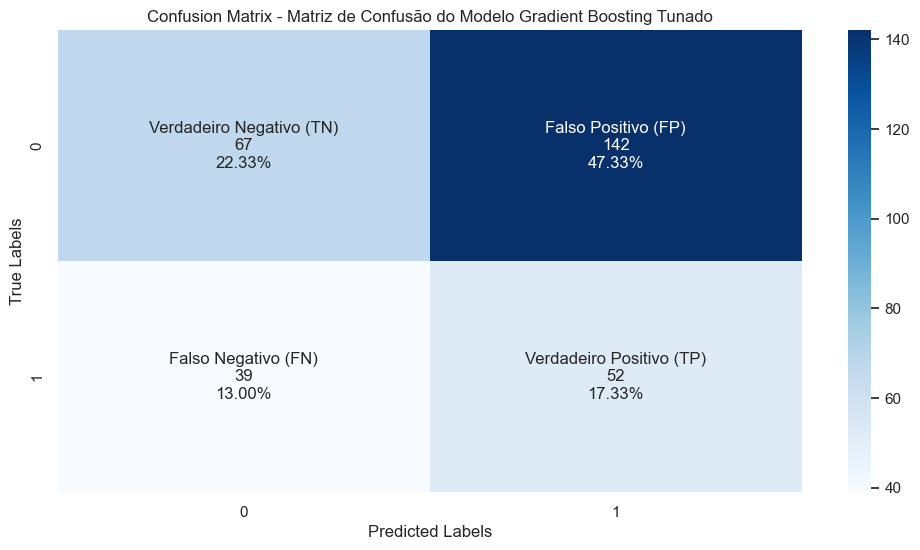

In [419]:
cm = confusion_matrix(y_test, modelo_gb_tunado.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo Gradient Boosting Tunado') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste **do melhor Modelo treinado**, acima, podemos verificar que:

- Temos um total de 300 observações. 91 (55 + 36) observações apresentam a classificação 1 para a Variável Inadimplencia. Ou seja, 91 observações da base de teste referem-se a clientes que ficaram inadimplentes em algum momento.

- Temos um total de 300 observações. 209 (174 + 35) observações apresentam a classificação 0 para a Variável Inadimplencia. Ou seja, 209 observações da base de teste referem-se a clientes que não ficaram inadimplentes em algum momento.

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **52** observações Verdadeiro Positivo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam positivas (dar inadimplência) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **142** observações Falso Positivo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam positivas (dar inadimplência), mas, de fato, foram negativas (não deram inadimplência). O Falso Positivo também é conhecido como Erro do Tipo I. É possível verificar que, com a tunagem dos hiperparâmetros buscando a medida Recall como referência para a otimização, o modelo passou a ter um maior número de Falsos Positivos. Ou seja, houve uma melhora no indicador Recall em detrimento de uma piora no indicador Precision. Essa piora no indicador Precision fará com que a Fintech possa deixar de fazer bons negócios ao negar crédito para possíveis bons clientes, mas a melhora no indicador Recall fará com que ela reduza o risco de emprestar para clientes que se tornarão inadimplentes. 

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **67** observações Verdadeiro Negativo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam negativas (não dar inadimplência) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **39** observações Falso Negativo. Ou seja, observações que o Modelo Gradient Boosting previu que seriam negativas (não dar inadimplência), mas, de fato, foram positivas (deram inadimplência). O Falso Negativo também é conhecido como Erro do Tipo II.